# **Capstone Project Modul 3**

Name: Adinda Prilly Cindana

Class: JCDS On Campus JKT Batch 32

# **Claim Prediction of Travel Insurance**

## **A. Business Problem**
---

### **1. Background Context**

**Terra General Insurance** is a leading general insurance provider in Southeast Asia, founded in 2012 with the vision of delivering protection that is *strong, transparent, and human-centered.* Guided by the tagline **“Solid Protection, Grounded in Trust,”** Terra has built a diverse portfolio of products including **TerraCare (health)**, **TerraMove (motor)**, **TerraHome (property)**, **TerraBiz (business)**, and **TerraTravel (travel insurance)** — the product that serves as the focus of this project.

In recent years, Terra has invested significantly in data science and automation to enhance its **risk management**, **underwriting precision**, and **claims assessment processes**.  
Travel insurance, in particular, presents a challenging yet valuable opportunity: while it protects customers from unpredictable events like medical emergencies, flight cancellations, or lost luggage, it also exposes the company to substantial claim-related risks.

Traditionally, Terra’s underwriting department assesses customer data collected through the **SPPA (Surat Permintaan Penutupan Asuransi)** form to determine coverage eligibility. However, with growing data availability, Terra aims to move beyond traditional rule-based assessments by integrating **machine learning** to predict the likelihood of a customer filing a claim during the policy period.

This predictive capability will allow Terra to optimize pricing strategies, refine risk segmentation, and ultimately reduce financial losses caused by high-risk customers — all while maintaining fairness and accessibility for travelers.

---

### **2. Stakeholders**

The primary stakeholder of this initiative is the **Underwriting Department**, responsible for evaluating risk and approving policy applications.  

---

### **3. Problem Statement**

The central business challenge for **Terra General Insurance** is to develop a predictive model capable of identifying high-risk travel insurance applicants who are likely to file claims.  
The key problems to address include:

1. How can a predictive model accurately estimate the likelihood of a claim submission based on historical travel insurance data?  
2. How does the machine learning approach compare to Terra’s existing **rule-based underwriting system** in terms of reducing financial losses associated with claim payouts?

---

### **4. Goals**

The main objectives of this project are:

1. To develop a **robust, data-driven claim prediction model** that helps identify high-risk policyholders.  
2. To evaluate and compare the performance of this model against the company’s **existing rule-based underwriting system**.  
3. To assess the **financial impact** of both systems by quantifying losses caused by **false negatives** — cases where the model fails to identify a policyholder who later files a claim.  
4. To deploy the best-performing model into a user-friendly application (e.g., via **Streamlit**) for practical use by the underwriting team.

---

### **5. Analytical Approach**

The project follows Terra’s standardized **data science workflow**:

1. **Data Preprocessing & Cleaning**  
   Handle missing values, outliers, and inconsistent entries to ensure data quality.  

2. **Exploratory Data Analysis (EDA)**  
   Perform univariate and multivariate analysis to identify key patterns, correlations, and claim-driving features.  

3. **Feature Engineering**  
   Transform categorical variables, encode data for modeling, and derive new features to enhance predictive power.  

4. **Model Benchmarking**  
   Train and evaluate a range of algorithms, including:  
   - Logistic Regression  
   - K-Nearest Neighbors (KNN)  
   - Decision Tree  
   - Random Forest  
   - XGBoost  
   - LightGBM  
   - AdaBoost  
   - CatBoost  
   - Ensemble methods (Voting & Stacking Classifiers)

5. **Model Evaluation**  
   Evaluate model performance using multiple metrics, with special emphasis on **Recall**, since minimizing **False Negatives**, an error where a high-risk policyholder (likely to file a claim) is incorrectly predicted as a non-claim, is crucial for reducing financial risk.  

6. **Hyperparameter Tuning**  
   Optimize the top-performing models to achieve maximum predictive accuracy and stability.  

7. **Rule-Based vs. ML Comparison**  
   After tuning, compare the **best-performing machine learning model** against the company’s **existing rule-based underwriting system**.  
   This comparison includes an analysis of **financial losses** attributed to **false negatives** — quantifying how much potential cost reduction Terra can achieve through ML adoption.  

8. **Model Deployment**  
   Deploy the best model using **Streamlit**, allowing underwriters to interact with the system in real time and integrate predictions into operational workflows.  

---

### **6. Expected Business Impact**

- **Improved underwriting efficiency** through automation and data-driven risk assessment.  
- **Reduced financial losses** by identifying high-risk applicants more accurately.  
- **Faster decision-making**, enhancing customer experience and operational agility.  
- **Strategic alignment** with Terra’s mission to leverage technology and data innovation for smarter protection solutions.


## **B. Data Understanding**

### Import Modul

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#modul untuk ML
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor , plot_tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#model
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier,Perceptron,PassiveAggressiveClassifier,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis


#imputer
from sklearn.impute import SimpleImputer, KNNImputer

#scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#encoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#binning
from sklearn.preprocessing import KBinsDiscretizer

#polynomial feature
from sklearn.preprocessing import PolynomialFeatures

#column transformer
from sklearn.compose import ColumnTransformer

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

#feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_regression, f_classif, RFE, SequentialFeatureSelector

#resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

#metric
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, recall_score, precision_score,f1_score, RocCurveDisplay, PrecisionRecallDisplay

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',None)

### Import Dataset

In [3]:
raw = pd.read_csv('data_travel_insurance.csv')
raw

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [4]:
raw.shape

(44328, 11)

In [5]:
raw.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim'],
      dtype='object')

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### **Data Overview**

The dataset originally consists of **44,328 rows** and **11 columns**.  
Each row represents one prospective policyholder (*calon nasabah*), with details provided in the following columns:

| **Column Name**          | **Description**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| **Agency**                | Name of the travel insurance agency.                                            |
| **Agency Type**           | Type or category of the travel insurance agency.                               |
| **Distribution Channel**  | Channel through which the travel insurance is distributed.                      |
| **Product Name**          | Name of the travel insurance product.                                          |
| **Gender**                | Gender of the insured individual.                                              |
| **Duration**              | Duration of the travel (in days).                                              |
| **Destination**           | Destination of the travel.                                                     |
| **Net Sales**             | Amount of sales for the travel insurance policy.                               |
| **Commission (in value)** | Commission amount received by the travel insurance agency.                     |
| **Age**                   | Age of the insured individual.                                                 |
| **Claim**                 | Claim status, indicates whether a claim was made during the coverage period.  |


In [7]:
pd.set_option('display.max_colwidth', 1)

listItem = []
for col in raw.columns :
    listItem.append( [col, raw[col].nunique(), raw[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76,

### **Feature Description**

From the information above, each column in the dataset can be described as follows:

1. **`Agency`**  
   Agency identifier with **16 unique values**. Constructed from letters and numbers, consisting of three characters (e.g., `C2B`, `EPX`, `JZI`).

2. **`Agency Type`**  
   The type of agency where the prospective policyholder purchased the insurance.  
   Contains **2 unique values**: `Airlines` and `Travel Agency`, indicating whether the purchase was made directly from an airline or through a travel agency.

3. **`Distribution Channel`**  
   The channel through which the travel insurance was distributed.  
   Contains **2 unique values**: `Offline` and `Online`.

4. **`Product Name`**  
   The name of the travel insurance product.  
   Contains **26 unique values**, meaning there are 26 different travel insurance products in the dataset.

5. **`Gender`**  
   The gender of the insured individual.  
   Contains **2 unique values**: `F` (Female) and `M` (Male).  
   There are also missing values (`NaN`) in this column, which will require handling during preprocessing.

6. **`Duration`**  
   The duration of the customer’s travel, measured in days.  
   Contains **437 unique values**.

7. **`Destination`**  
   The travel destination country of the customer.  
   Contains **138 unique values**, representing 138 different countries.

8. **`Net Sales`**  
   The total amount paid by the customer when purchasing the policy.  
   Contains **1,006 unique values**.

9. **`Commission (in value)`**  
   The commission amount received by the insurance agency.  
   Contains **915 unique values**.

10. **`Age`**  
   The age of the insured individual.  
   Contains **89 unique values**.

11. **`Claim`**  
   The claim status of the customer during the coverage period.  
   Contains **2 unique values**:  
   - `Yes`: The customer submitted a claim.  
   - `No`: The customer did not submit a claim.


## **Data Cleaning**

### **Check Duplicated Data**

In [8]:
df_duplicates = raw[raw.duplicated(keep=False)].sort_values(by=raw.columns.tolist())
df_duplicates

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
10217,ART,Airlines,Online,24 Protect,M,3,MALAYSIA,4.99,1.75,48,No
22009,ART,Airlines,Online,24 Protect,M,3,MALAYSIA,4.99,1.75,48,No
19436,ART,Airlines,Online,Value Plan,M,18,CHINA,61.00,21.35,118,No
31570,ART,Airlines,Online,Value Plan,M,18,CHINA,61.00,21.35,118,No
38456,ART,Airlines,Online,Value Plan,M,31,THAILAND,29.00,10.15,118,No
...,...,...,...,...,...,...,...,...,...,...,...
7886,TTW,Travel Agency,Offline,Child Comprehensive Plan,M,369,SINGAPORE,74.00,0.00,9,No
10520,TTW,Travel Agency,Offline,Individual Comprehensive Plan,M,364,SINGAPORE,97.00,0.00,33,No
32634,TTW,Travel Agency,Offline,Individual Comprehensive Plan,M,364,SINGAPORE,97.00,0.00,33,No
23563,TTW,Travel Agency,Offline,Individual Comprehensive Plan,M,364,SINGAPORE,97.00,0.00,42,No


In [9]:
raw.duplicated().sum()

np.int64(4667)

There are **4,667 duplicate rows** identified in the dataset.  
These duplicates will be **removed** to ensure data quality and prevent bias in the model training process.

In [10]:
df = raw.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

✅ The duplicates have been successfully removed.

### **Handling Missing Values**

In [12]:
df_null = pd.DataFrame(round(100*df.isna().sum()/len(df),2)).rename(columns={0:'Null Percentage'}).astype(str)+' %'
df_null['Null Count'] = df.isna().sum()
df_null

,Null Percentage,Null Count
Agency,0.0 %,0
Agency Type,0.0 %,0
Distribution Channel,0.0 %,0
Product Name,0.0 %,0
Gender,69.76 %,27667
Duration,0.0 %,0
Destination,0.0 %,0
Net Sales,0.0 %,0
Commision (in value),0.0 %,0
Age,0.0 %,0


The **`Gender`** column contains a significant amount of missing values, approximately **69.79%** of the total dataset.  
Since more than half of the values are missing (>50%), imputing them would likely reduce data quality and introduce bias.  

Additionally, gender is not considered a critical factor in the **underwriting process** for travel insurance compared to other attributes such as age, destination, or product type. [Source](https://www.bajajallianz.com/blog/travel-insurance-articles/travel-insurance-premium-affecting-factors.html)  

Therefore, the **`Gender`** column will be **removed** from the dataset to maintain data integrity.


In [13]:
df = df.drop('Gender', axis=1)

In [14]:
df.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

✅ The `Gender` column has been successfully removed.

### **Anomaly and Outlier Detection**

In addition to checking the number of unique values in each column, anomalies can also be detected by examining the **minimum** and **maximum** values of each numerical feature.  
Unusual or extreme values might indicate potential data entry errors or unrealistic records that could affect model performance.

To identify **outliers**, visualization techniques such as **boxplots** are used.  
Boxplots help highlight values that fall significantly outside the interquartile range (IQR), allowing a clear view of distributions and potential extreme data points.

In [15]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


#### 1. `Duration`
- The minimum duration value is **-1**, which is not reasonable since duration should always be positive.  
  This likely resulted from a data entry error, hence this record should be **removed**.  
- The maximum duration is **4881 days**, which is also unrealistic.  
  Based on domain knowledge, a single-trip policy usually has a maximum coverage of **365 days**,  
  and for annual policies, each trip typically has a maximum duration of **90–180 days**.  
  Therefore, such extreme values are considered **anomalies** and should be further reviewed or removed.


#### 2. `Net Sales`
- The minimum `Net Sales` value is **-357.5**, which is also an anomaly since net sales should represent  
  the amount received by the insurance company — thus, it should always be **positive** and above 0.  
  Negative values may indicate **policy cancellations** or **refunds**, and should be treated accordingly.  
- The maximum `Net Sales` value of **810 USD** appears reasonable and within normal range.


#### 3. `Commission (in value)`
- The minimum value of **0** is acceptable, as it may indicate cases where travel agencies received no commission.  
- The maximum value of **283 USD** is also reasonable **as long as the commission is lower than the net sales amount**.  
  However, cases where `Net Sales = 0` but `Commission > 0` are **illogical** and indicate potential anomalies  
  (possibly due to data entry errors, refund mismatches, or incomplete transaction records).


#### 4. `Age`
- The minimum age value of **0** is acceptable, as the insured individual could be an **infant under one year old**.  
- The maximum age value of **118** is unrealistic, since most travel insurance products limit eligibility to  
  individuals under **85 years old**. Therefore, entries with age values over **100 years** should be **removed**.

**Summary:**  
The anomalies identified above will either be **removed** or **further reviewed** to ensure data quality before modeling.

#### `Duration`

In [16]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


There are **2 rows** with a `Duration` value of **-1**, which is considered invalid.  
These rows will be **removed from the dataset**.

In [17]:
df = df[df['Duration'] >= 0]

In [18]:
df[df['Duration']<0]


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


✅ The rows have been successfully removed.

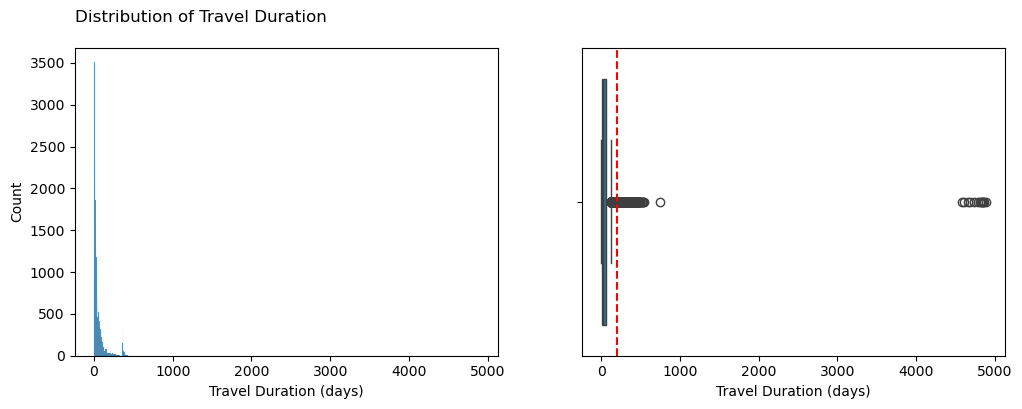

In [19]:
# extreme values line
extremeRight = df['Duration'].quantile(0.75) + 3*(df['Duration'].quantile(0.75)-df['Duration'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Travel Duration\n',loc='left')
sns.histplot(data=df, x='Duration')
plt.xlabel('Travel Duration (days)')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Duration')
plt.xlabel('Travel Duration (days)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

There are several records with a `Duration` value greater than **4000 days**, which is highly unrealistic for a travel insurance policy.  
Typically, the maximum coverage duration for a single-trip policy is **365 days**, and even annual policies usually limit each trip to **90–180 days**. [Source](https://www.avia.travel/insurance)

Therefore, records with a duration exceeding **4000 days** are considered **outliers** and need to be **removed from the dataset**.

In [20]:
df = df[df['Duration']<4000]

In [21]:
df[df['Duration']>4000]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


✅ The rows with `Duration > 4000` have been successfully removed.

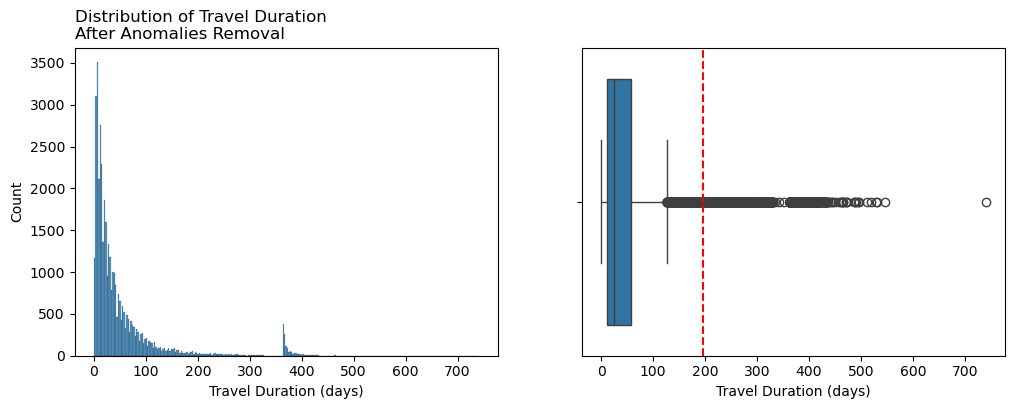

In [22]:
# extreme values line
extremeRight = df['Duration'].quantile(0.75) + 3*(df['Duration'].quantile(0.75)-df['Duration'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Travel Duration\nAfter Anomalies Removal',loc='left')
sns.histplot(data=df, x='Duration')
plt.xlabel('Travel Duration (days)')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Duration')
plt.xlabel('Travel Duration (days)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

#### `Net Sales`

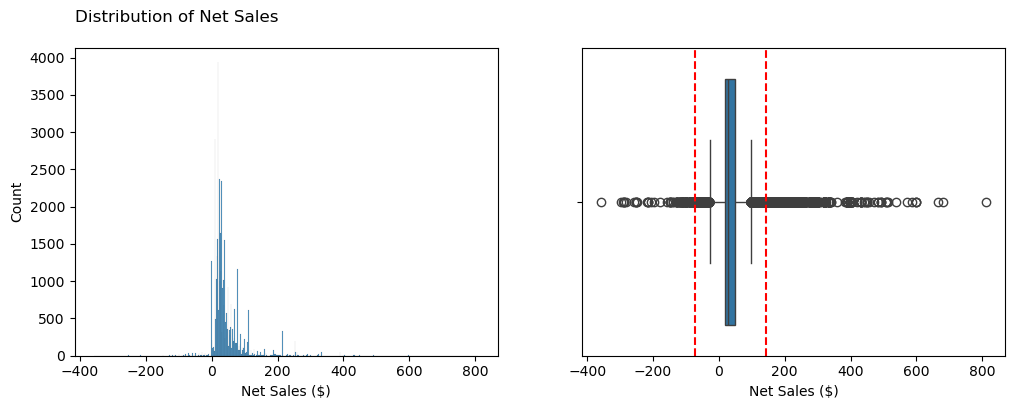

In [23]:
# extreme values line
extremeRight = df['Net Sales'].quantile(0.75) + 3*(df['Net Sales'].quantile(0.75)-df['Net Sales'].quantile(0.25))
extremeLeft = df['Net Sales'].quantile(0.25) - 3*(df['Net Sales'].quantile(0.75)-df['Net Sales'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Net Sales\n',loc='left')
sns.histplot(data=df, x='Net Sales')
plt.xlabel('Net Sales ($)')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Net Sales')
plt.xlabel('Net Sales ($)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.axvline(x=extremeLeft, linestyle='--', color='red')
plt.show()

During anomaly detection, negative values were found in the `Net Sales` column, which may indicate **policy cancellations**.  
Similarly, records with `Net Sales = 0` could also represent canceled or refunded policies.  

To validate this assumption, a check was performed to see whether any records with `Net Sales ≤ 0` had a `Claim` value of **"Yes"**.  
If all such records have `Claim = No`, it supports the hypothesis that these correspond to **canceled policies**.  

Since canceled or refunded policies are **outside the scope of the prediction model** (which focuses on active policies),  
all records with `Net Sales ≤ 0` will be **removed from the dataset**.

In [24]:
df[df['Net Sales']<=0]['Claim'].unique()

array(['No'], dtype=object)

The verification confirmed that all records with `Net Sales ≤ 0` have a `Claim` value of **"No"**.  
This finding supports the assumption that these entries correspond to **canceled or refunded policies**. 

In [25]:
df = df[df['Net Sales']>0]

In [26]:
df[df['Net Sales']<=0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


✅ These records have been **removed from the dataset** to maintain the focus on active policyholders relevant to the prediction model.

In [27]:
anomaly_rows = df[df['Commision (in value)'] > df['Net Sales']]
anomaly_rows

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


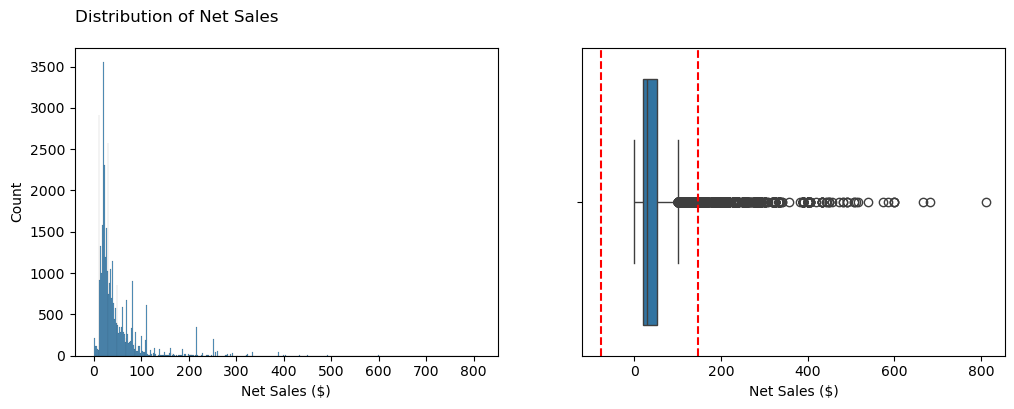

In [28]:
# extreme values line
extremeRight = df['Net Sales'].quantile(0.75) + 3*(df['Net Sales'].quantile(0.75)-df['Net Sales'].quantile(0.25))
extremeLeft = df['Net Sales'].quantile(0.25) - 3*(df['Net Sales'].quantile(0.75)-df['Net Sales'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Net Sales\n',loc='left')
sns.histplot(data=df, x='Net Sales')
plt.xlabel('Net Sales ($)')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Net Sales')
plt.xlabel('Net Sales ($)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.axvline(x=extremeLeft, linestyle='--', color='red')
plt.show()

#### `Commission`

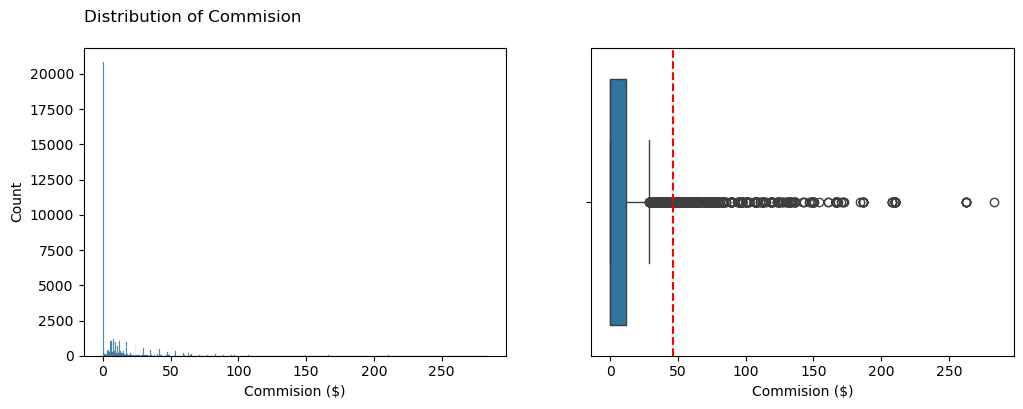

In [29]:
# extreme values line
extremeRight = df['Commision (in value)'].quantile(0.75) + 3*(df['Commision (in value)'].quantile(0.75)-df['Commision (in value)'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Commision\n',loc='left')
sns.histplot(data=df, x='Commision (in value)')
plt.xlabel('Commision ($)')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Commision (in value)')
plt.xlabel('Commision ($)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

From the visual inspection of the `Commission (in value)` distribution, several outliers were observed.  
However, most of these values remain within a reasonable range, while only a few extreme values exceed **250 USD**.  

Therefore, records with `Commission (in value) > 250` are considered **highly extreme outliers** and have been **removed from the dataset** to improve data quality.


In [30]:
df = df[df['Commision (in value)']< 250]

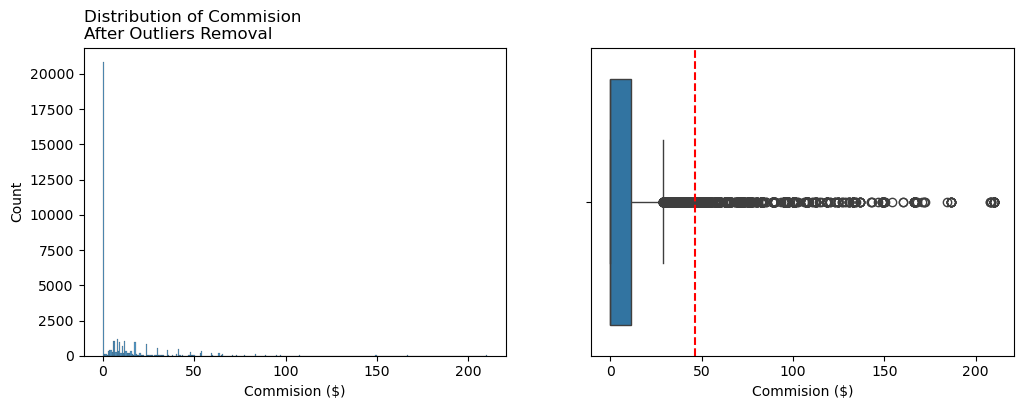

In [31]:
# extreme values line
extremeRight = df['Commision (in value)'].quantile(0.75) + 3*(df['Commision (in value)'].quantile(0.75)-df['Commision (in value)'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Commision\nAfter Outliers Removal',loc='left')
sns.histplot(data=df, x='Commision (in value)')
plt.xlabel('Commision ($)')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Commision (in value)')
plt.xlabel('Commision ($)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

✅ The rows with `Commission (in value) > 250` have been successfully removed.

#### `Age`

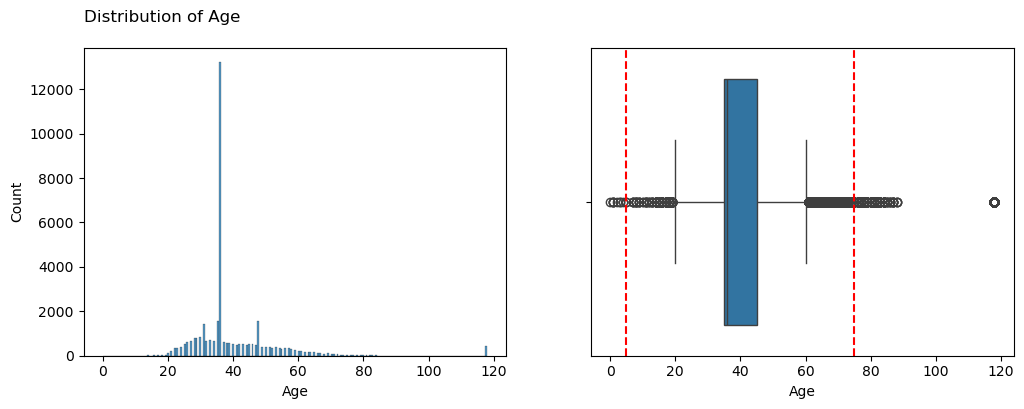

In [32]:
# extreme values line
extremeRight = df['Age'].quantile(0.75) + 3*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))
extremeLeft = df['Age'].quantile(0.25) - 3*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Age\n',loc='left')
sns.histplot(data=df, x='Age')
plt.xlabel('Age')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Age')
plt.xlabel('Age')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.axvline(x=extremeLeft, linestyle='--', color='red')
plt.show()

In [33]:
df['Age'].value_counts().reset_index().sort_values('Age', ascending=False)

,Age,count
24,118,456
82,88,3
72,87,6
78,86,4
77,85,4
...,...,...
87,4,1
85,3,2
86,2,1
79,1,4


There are **456 policyholders** recorded with an age of **118 years**, which is extremely rare and unrealistic.  
In the insurance industry, age is one of the key factors in the underwriting process, and most travel insurance products  set a maximum eligible age of around **85 years**.  

Therefore, records with `Age = 118` will be **removed from the dataset**.

In [34]:
df = df[df['Age']!=118]

In [35]:
df[df['Age']==118]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


✅ The rows with `Age = 118` have been successfully removed.

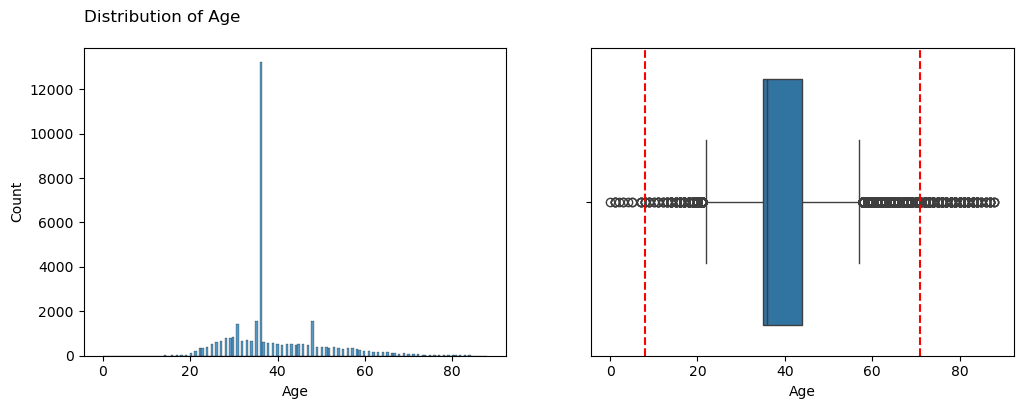

In [36]:
# extreme values line
extremeRight = df['Age'].quantile(0.75) + 3*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))
extremeLeft = df['Age'].quantile(0.25) - 3*(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Age\n',loc='left')
sns.histplot(data=df, x='Age')
plt.xlabel('Age')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Age')
plt.xlabel('Age')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.axvline(x=extremeLeft, linestyle='--', color='red')
plt.show()

## Exploratory Data Analysis

### Univariate Analysis

#### Target Variable (`Claim`)

In [37]:
df['Claim'].value_counts()

Claim
No     36788
Yes    668  
Name: count, dtype: int64

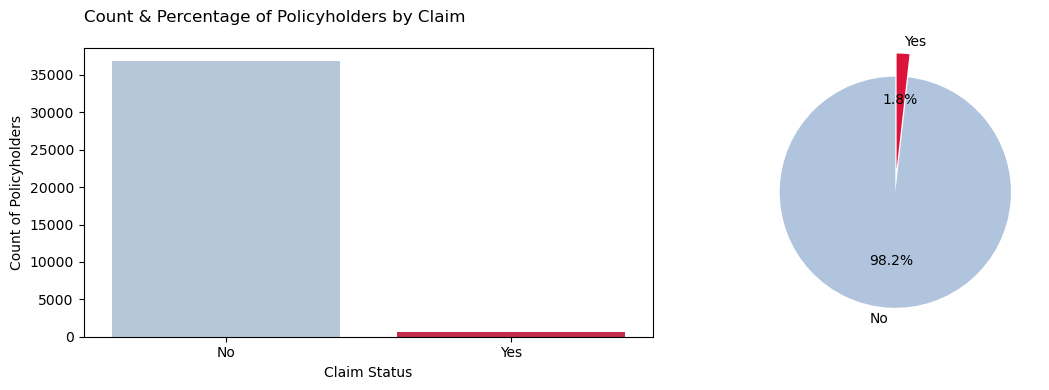

In [38]:
plt.figure(figsize=(12,4))

# --- Left: Barplot ---
plt.subplot(1,2,1)
claim_counts = df['Claim'].value_counts().reset_index()
claim_counts.columns = ['Claim', 'count']

sns.barplot(data=claim_counts, x='Claim', y='count',
            palette={'No': 'lightsteelblue', 'Yes': 'crimson'})

plt.xlabel('Claim Status')
plt.ylabel('Count of Policyholders')
plt.title('Count & Percentage of Policyholders by Claim\n', loc='left')

# --- Right: Pie Chart ---
plt.subplot(1,2,2)
plt.pie(claim_counts['count'],
        labels=claim_counts['Claim'],
        autopct='%.1f%%',
        startangle=90,
        colors=['lightsteelblue','crimson'],
        explode=[0.0, 0.2])

plt.tight_layout()
plt.show()


In [77]:
claim_counts

,Claim,count
0,No,36788
1,Yes,668


From the plot above, it can be seen that the dataset is **extremely imbalanced**, with only **1.8% of policyholders making claims**. This imbalance may cause the model to be biased toward predicting the majority class ("No Claim"), leading to poor performance in identifying the minority class ("Yes Claim"). Therefore, before proceeding to the modeling stage, techniques to **handle class imbalance** such as **oversampling, undersampling, or SMOTE** (Synthetic Minority Oversampling Technique) will be applied to improve model learning and ensure fairer prediction performance.

#### Categorical Features

**`Agency`**

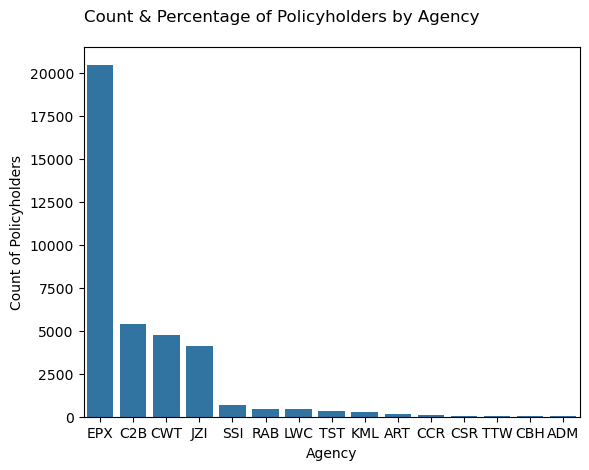

In [39]:
agency_counts = df['Agency'].value_counts().reset_index()
agency_counts.columns = ['Agency', 'count']

sns.barplot(data=agency_counts, x='Agency', y='count'
            # palette={'No': 'lightsteelblue', 'Yes': 'crimson'}
            )

plt.xlabel('Agency')
plt.ylabel('Count of Policyholders')
plt.title('Count & Percentage of Policyholders by Agency\n', loc='left')
plt.show()

The bar chart above shows the number of policyholders by agency. It can be observed that the EPX agency dominates the dataset, with more than 20,000 policyholders, far higher than any other agency. Other agencies such as C2B, CWT, and JZI also have a considerable number of policyholders but are still much fewer than EPX. The remaining agencies contribute very few customers.

**`Agency Type`**

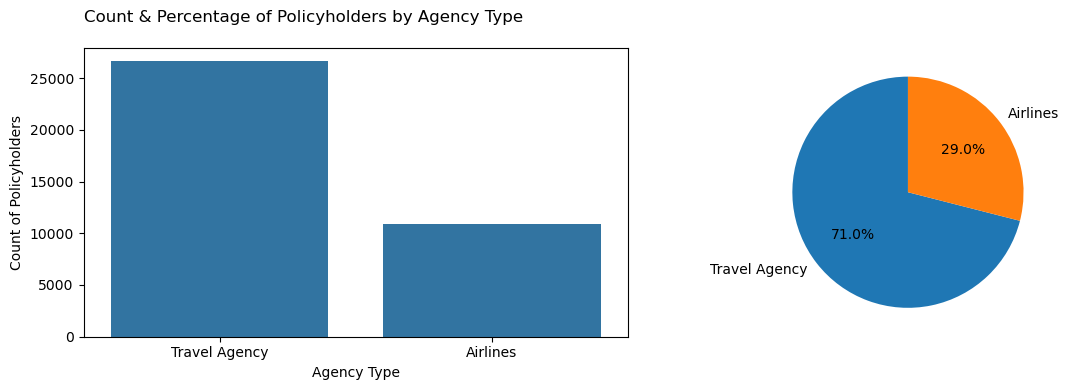

In [40]:
plt.figure(figsize=(12,4))

# --- Left: Barplot ---
plt.subplot(1,2,1)
agencyType_counts = df['Agency Type'].value_counts().reset_index()
agencyType_counts.columns = ['Agency Type', 'count']

sns.barplot(data=agencyType_counts, x='Agency Type', y='count')

plt.xlabel('Agency Type')
plt.ylabel('Count of Policyholders')
plt.title('Count & Percentage of Policyholders by Agency Type\n', loc='left')

# --- Right: Pie Chart ---
plt.subplot(1,2,2)
plt.pie(agencyType_counts['count'],
        labels=agencyType_counts['Agency Type'],
        autopct='%.1f%%',
        startangle=90,
        explode=[0.0, 0.0])

plt.tight_layout()
plt.show()


The majority of policies (around 71%) were issued through **Travel Agencies**, while the remaining 29% came from Airlines. 

This indicates that travel agencies play a dominant role in distributing travel insurance products compared to airlines. 

The difference in proportion could be due to the fact that many customers purchase travel insurance when booking travel packages through agencies, rather than directly from airlines.

**`Distribution Channel`**

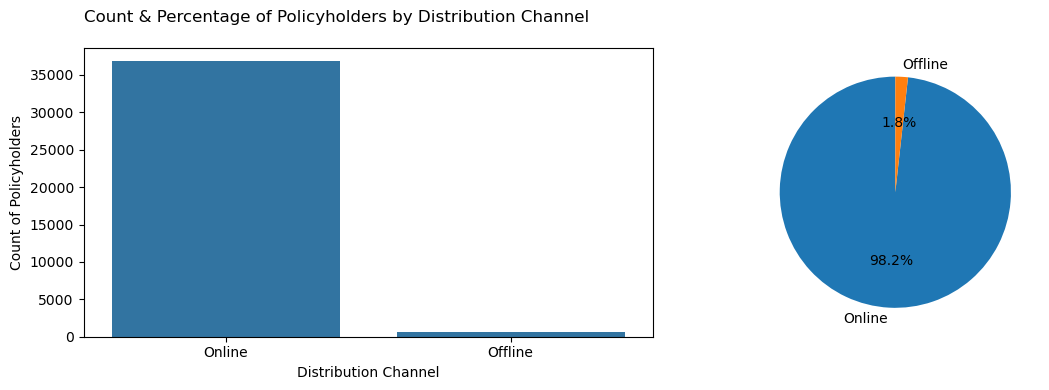

In [41]:
plt.figure(figsize=(12,4))

# --- Left: Barplot ---
plt.subplot(1,2,1)
dChannel_counts = df['Distribution Channel'].value_counts().reset_index()
dChannel_counts.columns = ['Distribution Channel', 'count']

sns.barplot(data=dChannel_counts, x='Distribution Channel', y='count')

plt.xlabel('Distribution Channel')
plt.ylabel('Count of Policyholders')
plt.title('Count & Percentage of Policyholders by Distribution Channel\n', loc='left')

# --- Right: Pie Chart ---
plt.subplot(1,2,2)
plt.pie(dChannel_counts['count'],
        labels=dChannel_counts['Distribution Channel'],
        autopct='%.1f%%',
        startangle=90,
        explode=[0.0, 0.0])

plt.tight_layout()
plt.show()


The vast majority of policyholders (98.2%) purchased their insurance through **online channels**, while only 1.8% purchased offline. 

This indicates that the online distribution channel dominates the insurance market, suggesting that customers prefer **the convenience and accessibility of online platforms**. 

The small proportion of offline sales may come from traditional agents or in-person transactions, but their contribution is minimal compared to online channels.

In [42]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

**`Product Name`**

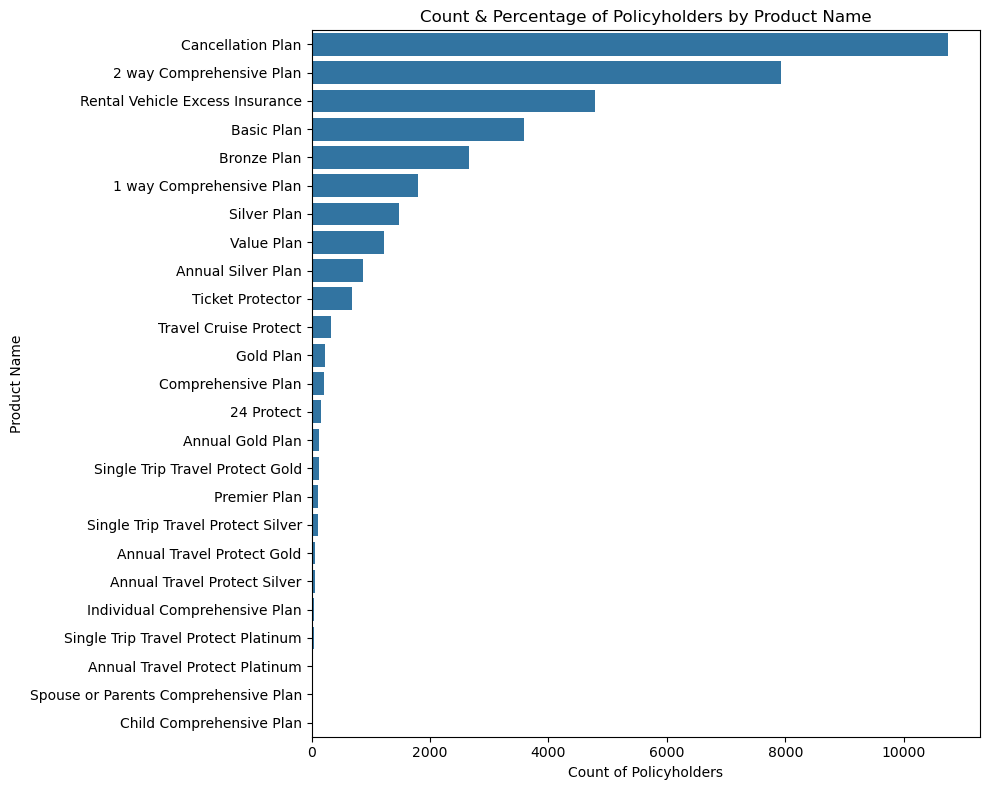

In [43]:
plt.figure(figsize=(10, 8))
product_counts = df['Product Name'].value_counts().reset_index()
product_counts.columns = ['Product Name', 'count']

sns.barplot(data=product_counts, y='Product Name', x='count')  # <– barh
plt.title('Count & Percentage of Policyholders by Product Name')
plt.xlabel('Count of Policyholders')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


From the visualization, the “Cancellation Plan” is the most popular product among policyholders, followed by the “2 way Comprehensive Plan” and “Rental Vehicle Excess Insurance.” These three products account for the majority of the total policies.

Meanwhile, products such as “Child Comprehensive Plan,” “Spouse or Parents Comprehensive Plan,” and “Annual Travel Protect Platinum” have very few policyholders, indicating that they are less preferred or cater to a niche market segment.

**`Destination`**

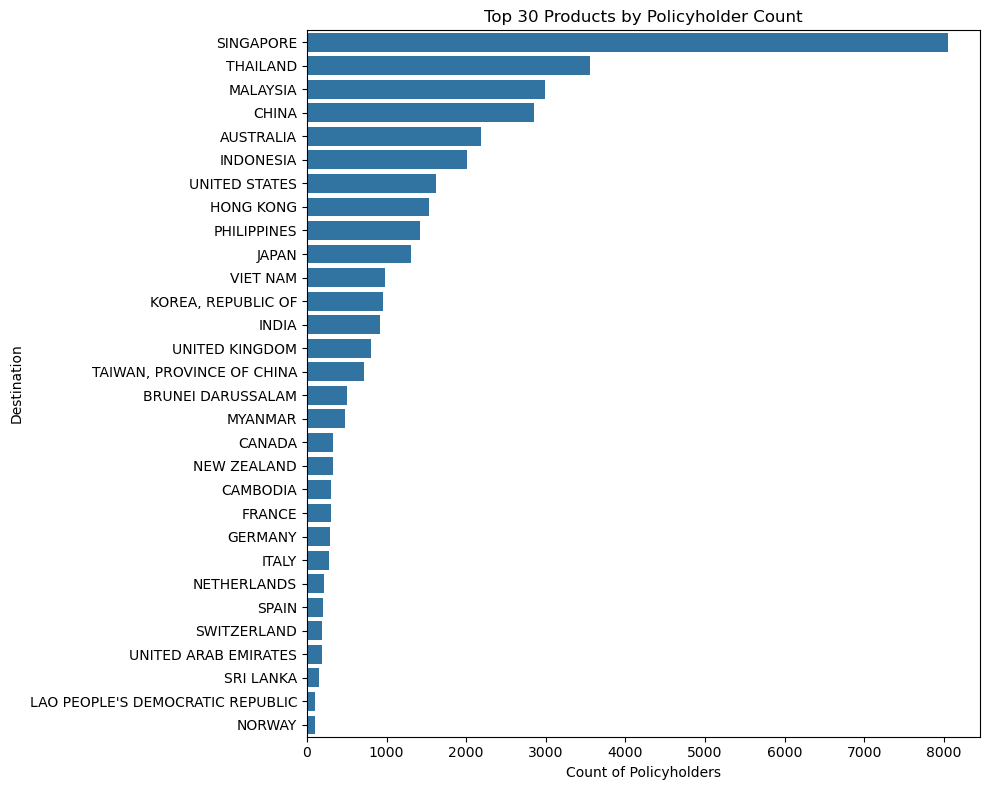

In [44]:
plt.figure(figsize=(10, 8))
destination_counts = df['Destination'].value_counts().reset_index().head(30)
destination_counts.columns = ['Destination', 'count']

sns.barplot(data=destination_counts, y='Destination', x='count')  # <– barh
plt.title('Top 30 Products by Policyholder Count')
plt.xlabel('Count of Policyholders')
plt.ylabel('Destination')
plt.tight_layout()
plt.show()


The visualization shows the top 30 destinations by policyholder count.

Singapore is by far the most popular travel destination among policyholders, followed by Thailand and Malaysia. These three destinations dominate the dataset, indicating that travelers tend to prefer nearby Southeast Asian countries.

Other frequently visited destinations include China, Australia, and Indonesia, showing a mix of regional and long-haul travel preferences.

In contrast, countries such as Norway, Lao People’s Democratic Republic, and Sri Lanka have the fewest policyholders, suggesting they are less common travel destinations among this insurance customer base.

#### Numerical Features

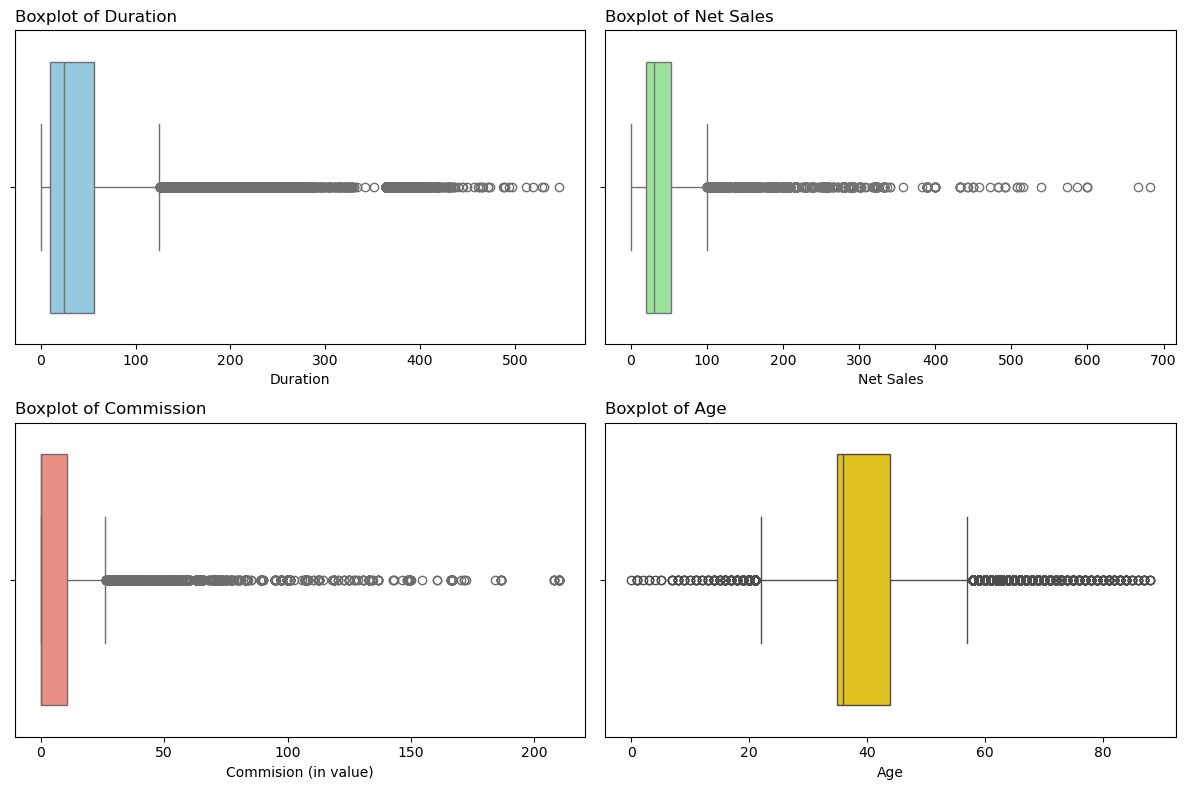

In [45]:
plt.figure(figsize=(12, 8))

# Boxplot 1: Duration
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Duration'], color='skyblue')
plt.title('Boxplot of Duration', loc='left')

# Boxplot 2: Net Sales
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Net Sales'], color='lightgreen')
plt.title('Boxplot of Net Sales', loc='left')

# Boxplot 3: Commission
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Commision (in value)'], color='salmon')
plt.title('Boxplot of Commission', loc='left')

# Boxplot 4: Age
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Age'], color='gold')
plt.title('Boxplot of Age', loc='left')

plt.tight_layout()
plt.show()

The numeric features related to transaction value (Duration, Net Sales, and Commission) exhibit **right-skewed distributions** with numerous outliers, which is typical of sales-related data where a few high-value customers contribute disproportionately to the total revenue. In contrast, Age shows a more normally distributed pattern, indicating that the customer base is relatively consistent in terms of demographics. These findings suggest that **applying scaling techniques such as the Robust Scaler** could help handle skewness and outliers, thereby improving model performance.

### Multivariate Analysis

#### Categorical Features vs Target

In [46]:
cat_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']

for feature in cat_features:
    ct = pd.crosstab(df[feature], df['Claim'], normalize='index') * 100
    ct = ct.sort_values('Yes', ascending=False).head(15)
    print(f'\n=== {feature} vs Claim (%) ===')
    display(ct.round(2))


=== Agency vs Claim (%) ===


Claim,No,Yes
Agency,,
C2B,92.46,7.54
LWC,93.22,6.78
KML,97.98,2.02
CBH,98.44,1.56
TTW,98.48,1.52
CSR,98.53,1.47
CWT,98.66,1.34
CCR,98.94,1.06
SSI,99.28,0.72



=== Agency Type vs Claim (%) ===


Claim,No,Yes
Agency Type,,
Airlines,96.01,3.99
Travel Agency,99.12,0.88



=== Distribution Channel vs Claim (%) ===


Claim,No,Yes
Distribution Channel,,
Online,98.21,1.79
Offline,98.78,1.22



=== Product Name vs Claim (%) ===


Claim,No,Yes
Product Name,,
Annual Gold Plan,87.60,12.40
Annual Silver Plan,87.61,12.39
Single Trip Travel Protect Platinum,88.64,11.36
Annual Travel Protect Gold,88.89,11.11
Spouse or Parents Comprehensive Plan,92.31,7.69
Silver Plan,92.70,7.30
Annual Travel Protect Silver,92.86,7.14
Annual Travel Protect Platinum,92.86,7.14
Bronze Plan,93.96,6.04



=== Destination vs Claim (%) ===


Claim,No,Yes
Destination,,
COSTA RICA,66.67,33.33
SINGAPORE,94.84,5.16
CZECH REPUBLIC,95.12,4.88
ICELAND,95.31,4.69
ISRAEL,96.77,3.23
SOUTH AFRICA,97.73,2.27
ITALY,97.83,2.17
TURKEY,97.92,2.08
FRANCE,97.99,2.01


**Agency**

The highest claim rate is observed in agency C2B (7.54%), followed by LWC (6.78%).
All other agencies have claim rates below 3%, indicating that only a few agencies show a relatively higher claim risk compared to the rest.

**Agency Type**

Despite having fewer policyholders, the Airlines agency type exhibits a higher claim rate than Travel Agencies.
This suggests that policies purchased directly through airlines may be associated with a higher likelihood of claims.

**Distribution Channel**

The claim rate between online and offline distribution channels is relatively similar, both around 1–2%, indicating that the distribution medium does not significantly influence claim occurrence.

**Product Name**

The Annual Gold Plan (12.4%) shows the highest claim rate, closely followed by the Annual Silver Plan (12.39%), Single Trip Travel Protect Platinum, and Annual Travel Protect Gold, all with claim rates above 10%.
Other products record claim rates below 8%, suggesting that higher-tier or annual plans may have a greater likelihood of claims.

**Destination**

Costa Rica stands out with an exceptionally high claim rate of 33.33%, while all other destinations remain below 6%.
This makes Costa Rica an outlier and may warrant further investigation into the reasons behind the unusually high claim frequency.

### Numerical Features vs Target

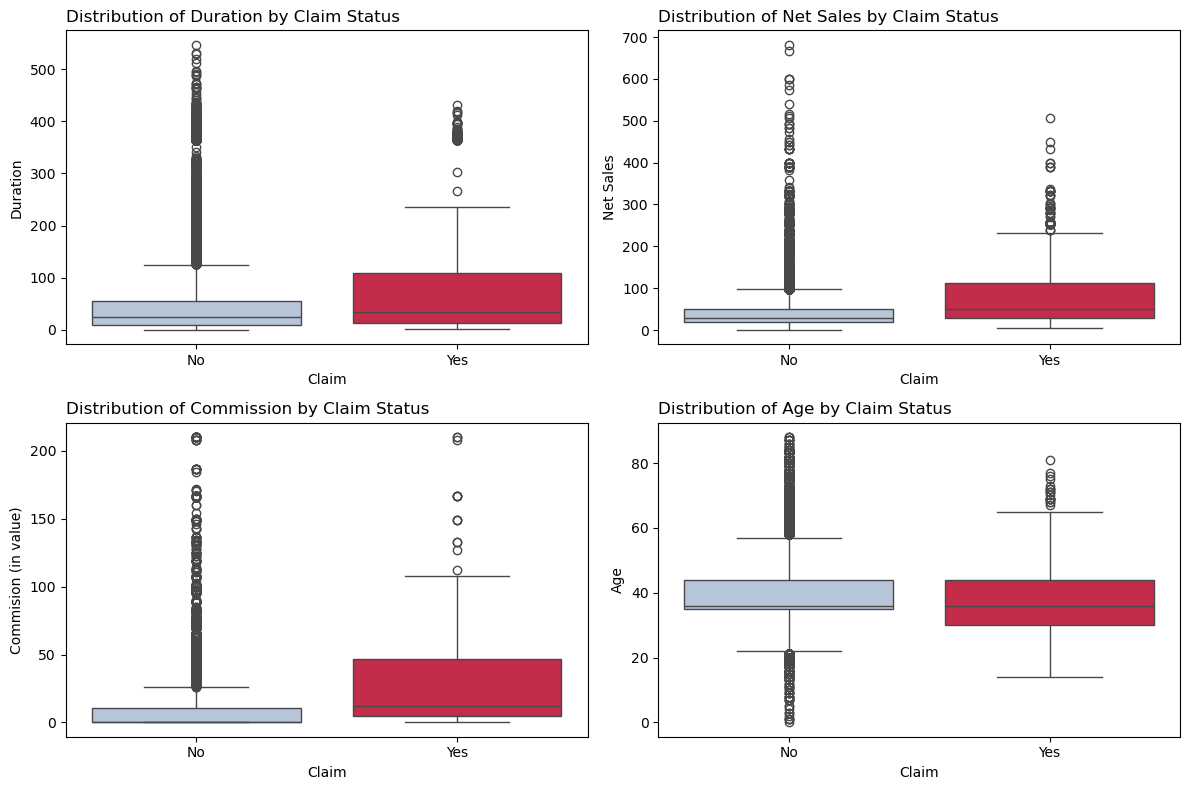

In [76]:
plt.figure(figsize=(12, 8))

# Boxplot 1: Duration
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Duration'], x=df['Claim'], palette=['lightsteelblue','crimson'])
plt.title('Distribution of Duration by Claim Status', loc='left')

# Boxplot 2: Net Sales
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Net Sales'], x=df['Claim'], palette=['lightsteelblue','crimson'])
plt.title('Distribution of Net Sales by Claim Status', loc='left')

# Boxplot 3: Commission
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Commision (in value)'], x=df['Claim'], palette=['lightsteelblue','crimson'])
plt.title('Distribution of Commission by Claim Status', loc='left')

# Boxplot 4: Age
plt.subplot(2, 2, 4)
sns.boxplot(y=df['Age'], x=df['Claim'], palette=['lightsteelblue','crimson'])
plt.title('Distribution of Age by Claim Status', loc='left')

plt.tight_layout()
plt.show()

The following boxplots compare the distribution of **Duration**, **Net Sales**, **Commission**, and **Age** between customers who made a **Claim (“Yes”)** and those who did **not (“No”)**.

**1. Duration**

Customers who **made a claim** tend to have **longer durations** than those who did not.  
The median duration for claimants is noticeably higher, and while both groups show several outliers, the non-claim group has more extreme ones.  
This suggests that **longer travel periods may increase exposure to risk**, leading to a higher likelihood of filing a claim.


**2. Net Sales**

Policies associated with **claims** have **higher median net sales** compared to those without claims.  
Although both groups contain several high-value outliers, the general pattern indicates that customers who spend more on their insurance (potentially due to longer trips or more comprehensive coverage) are **more likely to submit a claim**.

**3. Commission**

The **commission values** are also higher for the claim group.  
Because commissions often scale with policy value, this supports the previous finding — policies with **higher monetary value** are linked with **a greater chance of claims**.

**4. Age**

The **median age** of customers who filed a claim is slightly higher than those who did not, but the overlap between groups is large.  
This suggests that **age may have only a weak effect** on claim behavior compared to the other variables.
**Summary**
| Variable | Relationship with Claim | Interpretation |
|-----------|------------------------|----------------|
| **Duration** | Strong | Longer trips -> greater exposure -> more claims |
| **Net Sales** | Moderate–Strong | Higher policy value -> more claims |
| **Commission** | Moderate | Related to policy value |
| **Age** | Weak | Slight tendency for older travelers to claim |

Overall, **duration** appears to be the most influential factor, followed by **net sales** and **commission**, while **age** shows a comparatively minor effect.

### Correlation between Numerical Features

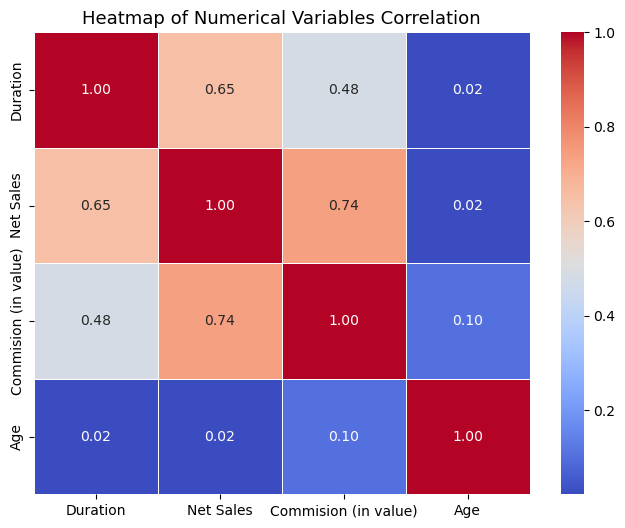

In [48]:
# Define numerical features
num_cols = df.select_dtypes(include='number').columns

# Hitung korelasi antar variabel numerik
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Variables Correlation", fontsize=13)
plt.show()

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = df.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = num_cols.columns
vif_data["VIF"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif_data

,feature,VIF
0,Duration,2.513628
1,Net Sales,5.150428
2,Commision (in value),2.693568
3,Age,1.818982


Based on the Variance Inflation Factor (VIF) calculation, the **Net Sales variable has a VIF value of 5**, indicating a moderately high correlation with other variables (particularly Commission). Although it does not yet reach the level of severe multicollinearity (>10), this value is above the commonly acceptable threshold (>4). Therefore, for models that are sensitive to multicollinearity, such as Logistic Regression, it is recommended to apply regularization or consider removing one of the highly correlated variables.

## Data Analysis

### Define Features and Target

In [50]:
#features
X=df[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales','Commision (in value)', 'Age']]

In [51]:
df['Target'] = np.where(df['Claim']=='No', 0, 1) # Define status claim as numbers (0: No, 1: Yes)
#target
y=df['Target']

### Split Data into Training and Testing

In [52]:
#split train & test
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) 

### Model Benchmarking

In [53]:
pd.set_option('display.max_colwidth', 1)

listItem = []
for col in X.columns :
    listItem.append( [col, X[col].nunique(), X[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Agency,15,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, TTW, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,25,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Premier Plan, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan]"
4,Duration,419,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 1, 35, 36, 75, 32, 232, 37, 10, 15, 17, 99, 173, 74, 23, 82, 66, 156, 73, 39, 95, 98, 111, 53, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 0, 76, 69, 110, 146, 116, 129, 84, 33, 149, 100, 68, 64, ...]"
5,Destination,134,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, BELGIUM, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, UNITED ARAB EMIRATES, NETHERLANDS, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, VENEZUELA, NEPAL, SOUTH AFRICA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, SLOVENIA, EGYPT, ...]"
6,Net Sales,867,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 227.7, 48.5, 24.0, 161.0, 99.0, 59.4, 45.0, 44.0, 19.0, 75.0, 39.0, 17.55, 51.0, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 37.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, 83.0, 35.5, 13.5, 63.5, 73.0, 13.0, ...]"
7,Commision (in value),873,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 41.58, 5.25, 6.0, 136.62, 31.53, 11.55, 40.25, 59.4, 35.64, 15.75, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 5.63, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 23.76, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 77.22, 12.95, 3.23, 15.93, 3.74, 46.96, 16.25, 9.2, ...]"
8,Age,88,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 50, 34, 38, 44, 45, 53, 20, 30, 69, 52, 25, 40, 41, 70, 76, 74, 66, 63, 55, 21, 60, 75, 24, 62, 73, 64, 71, 5, 14, 72, 84, 81, 16, 19

After completing data preprocessing and exploratory data analysis, the next step is to build and evaluate multiple machine learning models to determine which one performs best for **claim prediction** at **Terra General Insurance**.  
This stage, known as **model benchmarking**, helps identify the algorithm that most effectively captures the underlying patterns in the data and minimizes business risk.

---

### **1. Data Transformation Pipeline**

Before training the models, all input features are passed through a **data transformation pipeline**. This ensures that categorical and numerical variables are properly encoded and scaled for machine learning algorithms.

#### ColumnTransformer
The `ColumnTransformer` allows us to apply different preprocessing steps to different feature types in a single pipeline.  
Here’s the breakdown of what each component does:

- **Categorical 1: One-Hot Encoding**  
  Applied to columns like `Agency Type` and `Distribution Channel`.  
  These features have only a few possible categories, so one-hot encoding expands them into binary columns while dropping the first category (`drop='first'`) to avoid redundancy.

- **Categorical 2: Binary Encoding**  
  Applied to `Agency`, `Product Name`, and `Destination`.  
  These columns have many unique categories, making one-hot encoding inefficient.  
  **Binary Encoding** converts categories into binary digits, offering a more compact representation that helps prevent the *curse of dimensionality* while retaining interpretability.

- **Numerical Features: Robust Scaler**  
  Applied to continuous features such as `Duration`, `Net Sales`, `Commision (in value)`, and `Age`.  
  The **RobustScaler** scales data using the interquartile range (IQR), making it less sensitive to **outliers**.

---

### **2. Resampling Techniques**

Because the dataset is **imbalanced** (with far fewer claim cases than non-claims), resampling is necessary to ensure the model doesn’t become biased toward predicting the majority class.

Two resampling techniques were tested:
- **SMOTE (Synthetic Minority Oversampling Technique):** creates synthetic examples of the minority class to balance the data.
- **Neighbourhood Cleaning Rule (NCR):** removes ambiguous samples from the majority class to create a cleaner decision boundary.

These methods were included in the model pipeline to determine which approach provides the best performance during cross-validation.

---

### **3. Feature Selection**

To identify the most relevant predictors, a **SelectKBest** feature selection method is applied with the `f_classif` statistical test.  
This selects the top *k* features most correlated with the target variable.  
Testing `k=10` and `k=20` allows us to compare whether using more or fewer features affects predictive performance.

---

### **4. Model Benchmarking**

A total of **12 machine learning models** were benchmarked, ranging from simple linear models to complex ensemble methods:

| Category | Algorithms |
|-----------|-------------|
| **Linear Model** | Logistic Regression |
| **Tree-based Models** | Decision Tree, Random Forest |
| **Instance-based** | K-Nearest Neighbors (KNN) |
| **Boosting Methods** | AdaBoost, XGBoost, LightGBM, CatBoost |
| **Bagging** | Bagging Classifier |
| **Ensemble (Voting)** | Hard Voting, Soft Voting |
| **Stacking** | Stacking Classifier with Decision Tree as meta-learner |

Benchmarking these diverse models allows Terra to compare different learning strategies and determine which one most effectively predicts the likelihood of a customer filing a travel insurance claim.

---

### **5. Evaluation Metric — Why Recall?**

In the insurance business context, predicting **false negatives** (cases where a high-risk customer is predicted as low-risk) can lead to **financial losses** because those customers may eventually file claims that weren’t anticipated.  

Therefore, this project uses **Recall** as the primary evaluation metric.  
- **Recall** measures the proportion of actual claimants correctly identified by the model.  
- Prioritizing recall ensures that the model minimizes **missed claim risks**, even if it means accepting a few more false positives (predicting a claim when there isn’t one).

In other words, Terra prefers to “play it safe”, which means it’s better to flag a low-risk traveler as high-risk than to overlook someone likely to claim.

---

### **6. Hyperparameter Tuning with GridSearchCV**

To find the best combination of preprocessing, resampling, and model settings, **GridSearchCV** is used.

#### What is GridSearchCV?
`GridSearchCV` performs an **exhaustive search** over a predefined set of hyperparameters for each model.  
It systematically tests every possible combination of parameters using **cross-validation**, ensuring that results are both accurate and generalizable.

#### How it works:
1. The pipeline integrates preprocessing, feature selection, resampling, and classification steps.
2. The parameter grid (`param_grid`) defines combinations of models, feature counts, and resampling strategies.
3. Using **5-fold Stratified Cross-Validation**, each configuration is evaluated using the **Recall** metric.
4. The model with the highest recall score is selected as the **best estimator** for further evaluation.

---

This comprehensive benchmarking process enables Terra General Insurance to identify the model that provides the **best trade-off between accuracy, recall, and operational efficiency**, paving the way for a reliable claim prediction system.


In [54]:
#define transformer

preprocessor=ColumnTransformer(
                    transformers=[
                    ('Categorical 1', Pipeline([('encoder',OneHotEncoder(drop='first'))]),['Agency Type','Distribution Channel']),
                    ('Categorical 2', Pipeline([('encoder', ce.BinaryEncoder())]),['Agency','Product Name','Destination']),
                    ('Numerical', Pipeline([('scaler',RobustScaler())]), ['Duration', 'Net Sales','Commision (in value)', 'Age']),
                    ],
remainder='passthrough') 

#resampler
ncr=NeighbourhoodCleaningRule()
smote=SMOTE(random_state=42)



#feature selection
select_kbest=SelectKBest(score_func=f_classif,k=10)

#model
logreg=LogisticRegression(random_state=42)
tree=DecisionTreeClassifier(random_state=42)
knn=KNeighborsClassifier()
voting_soft=VotingClassifier([('clf1',logreg),('clf2',tree),('clf3', knn)],voting='soft')
voting_hard=VotingClassifier([('clf1',logreg),('clf2',tree),('clf3', knn)],voting='hard')
stack=StackingClassifier([('clf1',logreg),('clf2',tree),('clf3', knn)],
                 final_estimator=tree #meta classifier
                        )
bagging=BaggingClassifier(tree,random_state=42)
rf=RandomForestClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
lgbm=LGBMClassifier(random_state=42)
cat=CatBoostClassifier(verbose=0,random_state=42)

#Create Pipeline
pipeline=ImbPipeline(steps=[
('preprocessor',preprocessor),
('feature_selection',select_kbest),   
('resampler',smote),   
('classifier',logreg)   
])

#prameter yang akan di tune

param_grid=[
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [logreg],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [tree],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [knn],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [voting_hard],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [voting_soft],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [stack],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [bagging],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [rf],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [ada],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [xgb],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [lgbm],
    }, 
    {'feature_selection__k':[10,20],
     'resampler' :[ncr,smote],
     'classifier' : [cat],
    }

]


#Hyperparam tuning with GSCV
gscv=GridSearchCV(pipeline, param_grid,cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),n_jobs=-1,scoring='recall',
    return_train_score=True)

import time

#create start time
start_time=time.time()

#fit model
gscv.fit(X_train,y_train)

#create end time
end_time=time.time()

fitting_time=end_time-start_time

print(f"fitting time : {fitting_time:.2f} second")

[LightGBM] [Info] Number of positive: 23544, number of negative: 23544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.105589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 47088, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 23544, number of negative: 23544
[LightGBM] [Info] Number of positive: 23544, number of negative: 23544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1942
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of

In [55]:
gscv.best_estimator_

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Categorical 1', ...), ('Categorical 2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
pd.set_option('display.max_rows', 10)
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')[['param_classifier','param_feature_selection__k','param_resampler', 'mean_train_score','std_train_score' ,'mean_test_score','std_test_score']].reset_index()

,index,param_classifier,param_feature_selection__k,param_resampler,mean_train_score,std_train_score,mean_test_score,std_test_score
0,3,LogisticRegression(random_state=42),20,SMOTE(random_state=42),0.721454,0.019066,0.713454,0.023687
1,1,LogisticRegression(random_state=42),10,SMOTE(random_state=42),0.693825,0.012402,0.689120,0.011366
2,33,AdaBoostClassifier(random_state=42),10,SMOTE(random_state=42),0.679773,0.015815,0.662864,0.042277
3,35,AdaBoostClassifier(random_state=42),20,SMOTE(random_state=42),0.670892,0.038327,0.647893,0.065170
4,41,LGBMClassifier(random_state=42),10,SMOTE(random_state=42),0.590353,0.012644,0.408182,0.029730
...,...,...,...,...,...,...,...,...
43,14,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=42)),\n ('clf2', DecisionTreeClassifier(random_state=42)),\n ('clf3', KNeighborsClassifier())])",20,NeighbourhoodCleaningRule(),0.103458,0.015515,0.016822,0.012399
44,0,LogisticRegression(random_state=42),10,NeighbourhoodCleaningRule(),0.001404,0.001146,0.000000,0.000000
45,2,LogisticRegression(random_state=42),20,NeighbourhoodCleaningRule(),0.001872,0.000936,0.000000,0.000000
46,32,AdaBoostClassifier(random_state=42),10,NeighbourhoodCleaningRule(),0.000000,0.000000,0.000000,0.000000


Following the benchmarking phase, the two models that demonstrated the best overall performance were **Logistic Regression** and **AdaBoost**.  
To further enhance the model performance, a third model, **CatBoost**, was also included for comparison, as it is well-known for handling **datasets with many categorical variables**.

Hyperparameter tuning was then performed to identify the most optimal configurations for these three models.

---

### **Pipeline Structure**

The **pipeline** ensures that all steps — preprocessing, feature selection, resampling, and classification — are executed consistently within each cross-validation fold.

Steps included:
1. **Preprocessor:** Handles both categorical and numerical transformations via a `ColumnTransformer`.  
   - Categorical 1: OneHotEncoder (for low-cardinality categories)  
   - Categorical 2: BinaryEncoder (for high-cardinality categories)  
   - Numerical: RobustScaler (to minimize the impact of outliers)  
2. **Feature Selection:** `SelectKBest` with `f_classif` to retain the top-performing features.  
3. **Resampling:** Either **SMOTE** or **Neighbourhood Cleaning Rule (NCR)** to address class imbalance.  
4. **Classifier:** One of the three models (Logistic Regression, AdaBoost, or CatBoost).

This modular pipeline design allows the entire process — from data cleaning to model fitting — to be reproduced and validated consistently.

---

### **Hyperparameter Search Strategy**

Instead of testing every possible parameter combination (which would be computationally expensive), the project uses **RandomizedSearchCV** — a more efficient alternative to Grid Search.

#### What is RandomizedSearchCV?
`RandomizedSearchCV` randomly samples from a defined range of hyperparameters and evaluates each combination using **cross-validation**.  
This method reduces computation time while still exploring a wide parameter space effectively.


### **Parameter Space Overview**

Each model was tuned across multiple hyperparameters:

- **Logistic Regression:**  
  Regularization strength (`C`), penalty type, iteration limits, and feature subset size.

- **AdaBoost:**  
  Number of estimators and learning rate to control how quickly the model adapts to misclassifications.

- **CatBoost:**  
  Depth of trees, learning rate, and number of iterations to balance complexity and generalization.

---

In [57]:
from imblearn.combine import SMOTEENN, SMOTETomek
# === 1. Define Preprocessor ===
preprocessor = ColumnTransformer(
    transformers=[
        ('Categorical 1', Pipeline([
            ('encoder', OneHotEncoder(drop='first'))
        ]), ['Agency Type', 'Distribution Channel']),
        
        ('Categorical 2', Pipeline([
            ('encoder', ce.BinaryEncoder())
        ]), ['Agency', 'Product Name', 'Destination']),
        
        ('Numerical', Pipeline([
            ('scaler', RobustScaler())
        ]), ['Duration', 'Net Sales', 'Commision (in value)', 'Age'])
    ],
    remainder='passthrough'
)

# === 2. Resamplers ===
ncr = NeighbourhoodCleaningRule()
smote = SMOTE(random_state=42)


# === 3. Models ===
logreg = LogisticRegression(random_state=42)
ada = AdaBoostClassifier(random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)
base_tree = DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=42)

# === 4. Pipeline ===
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=20)),
    ('resampler', smote),
    ('classifier', logreg)
])

# === 5. Parameter Space ===
param_distributions = [
    # Logistic Regression
    {
        'feature_selection__k': [10, 20, 30],
        'resampler': [ncr, smote],
        'classifier': [logreg],
        'classifier__C': [0.1, 1, 10, 100, 1000],
        'classifier__penalty': ['l2'],
        'classifier__max_iter': [100, 200],
        'classifier__class_weight': ['balanced']
    },

    # AdaBoost
    {
        'feature_selection__k': [10, 20, 30],
        'resampler': [smote],
        'classifier': [ada],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1.0]
    },

    # CatBoost
    {
        'feature_selection__k': [10, 20, 30],
        'resampler': [smote],
        'classifier': [cat],
        'classifier__depth': [4, 6, 8],
        'classifier__iterations': [200, 500],
        'classifier__learning_rate': [0.01, 0.05, 0.1]
    }
]

# === 6. RandomizedSearchCV ===
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=200,                   
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    random_state=42,
    verbose=2,
    return_train_score=True
)

# === 7. Fit & Measure Time ===
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

print(f"Fitting time: {end_time - start_time:.2f} seconds")
print(f"Best params: {random_search.best_params_}")
print(f"Best recall: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 141 candidates, totalling 423 fits
[CV] END classifier=LogisticRegression(random_state=42), classifier__C=0.1, classifier__class_weight=balanced, classifier__max_iter=100, classifier__penalty=l2, feature_selection__k=10, resampler=SMOTE(random_state=42); total time=   0.6s
[CV] END classifier=LogisticRegression(random_state=42), classifier__C=0.1, classifier__class_weight=balanced, classifier__max_iter=100, classifier__penalty=l2, feature_selection__k=10, resampler=SMOTE(random_state=42); total time=   0.6s
[CV] END classifier=LogisticRegression(random_state=42), classifier__C=0.1, classifier__class_weight=balanced, classifier__max_iter=100, classifier__penalty=l2, feature_selection__k=10, resampler=SMOTE(random_state=42); total time=   0.7s
[CV] END classifier=LogisticRegression(random_state=42), classifier__C=0.1, classifier__class_weight=balanced, classifier__max_iter=100, classifier__penalty=l2, feature_selection__k=20, resampler=SMOTE(random_state=42); 

In [58]:
random_search.best_estimator_

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Categorical 1', ...), ('Categorical 2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
pd.set_option('display.max_rows', 10)
pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')[['param_classifier','param_feature_selection__k','param_resampler', 'mean_train_score','std_train_score' ,'mean_test_score','std_test_score']].reset_index()

,index,param_classifier,param_feature_selection__k,param_resampler,mean_train_score,std_train_score,mean_test_score,std_test_score
0,15,LogisticRegression(random_state=42),20,SMOTE(random_state=42),0.725655,0.028027,0.717228,0.037359
1,21,LogisticRegression(random_state=42),20,SMOTE(random_state=42),0.725655,0.028027,0.717228,0.037359
2,27,LogisticRegression(random_state=42),20,SMOTE(random_state=42),0.727528,0.025540,0.717228,0.037359
3,44,LogisticRegression(random_state=42),20,NeighbourhoodCleaningRule(),0.731273,0.028027,0.717228,0.030542
4,45,LogisticRegression(random_state=42),20,SMOTE(random_state=42),0.727528,0.025540,0.717228,0.037359
...,...,...,...,...,...,...,...,...
136,137,<catboost.core.CatBoostClassifier object at 0x16c4f4b90>,30,SMOTE(random_state=42),0.497191,0.025229,0.136704,0.017366
137,122,<catboost.core.CatBoostClassifier object at 0x16c4f4b90>,30,SMOTE(random_state=42),0.377341,0.015271,0.089888,0.004587
138,121,<catboost.core.CatBoostClassifier object at 0x16c4f4b90>,20,SMOTE(random_state=42),0.384831,0.014323,0.088015,0.016109
139,140,<catboost.core.CatBoostClassifier object at 0x16c4f4b90>,30,SMOTE(random_state=42),0.505618,0.016055,0.078652,0.007945


In [60]:
random_search.best_params_

{'resampler': SMOTE(random_state=42),
 'feature_selection__k': 20,
 'classifier__penalty': 'l2',
 'classifier__max_iter': 100,
 'classifier__class_weight': 'balanced',
 'classifier__C': 1,
 'classifier': LogisticRegression(random_state=42)}

#### Understanding Logistic Regression

Despite its name, **Logistic Regression** is actually a **classification algorithm** used to predict **binary outcomes**. In this case, whether a customer **will make a claim (1)** or **not (0)**.

Unlike **Linear Regression**, which produces continuous values that can go beyond the 0–1 range, Logistic Regression introduces a **sigmoid (S-shaped)** function to map these continuous outputs into probabilities between 0 and 1.

<div align="center">
    <img src="Algorithm Chains (1).png" alt="Linear vs Logistic Regression" width="600">
</div>


**Figure:** Comparison between Linear Regression and Logistic Regression.  
- The **left** plot shows how Linear Regression outputs can exceed the range \[0, 1\].  
- The **right** plot shows how Logistic Regression constrains predictions within \[0, 1\] using the **sigmoid curve**.

---

#### How Logistic Regression Works

In Linear Regression, the model predicts a continuous value:

$
z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
$

However, for classification problems, we need probabilities — values between **0 and 1**.  
To achieve this, Logistic Regression applies the **sigmoid function** to transform \( z \) into a probability:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

So, the probability that an observation belongs to the positive class (*Claim = 1*) is calculated as:

$
P(y = 1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n)}}
$

---

#### Decision Threshold

Once the model calculates the probability, a threshold (commonly 0.5) is applied to classify outcomes:

- If $ P(y = 1 | x) \geq 0.5 $ -> **Claim (1)**  
- Else -> **No Claim (0)**

---

In short, Logistic Regression transforms a **linear relationship** into a **probabilistic interpretation** using the **sigmoid function**, and then uses the **logit** (log-odds) to make clear, interpretable predictions about claim likelihoods.

Source: 

[1. Machine Lerning Geek](https://machinelearninggeek.com/understanding-logistic-regression-and-building-model-in-python/)

[2. Geeks for Geeks](https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/)


**Threshold Tuning**

To evaluate how the classification threshold affects model performance, the chart below visualizes **Precision**, **Recall**, and **F2-score** across different threshold values.

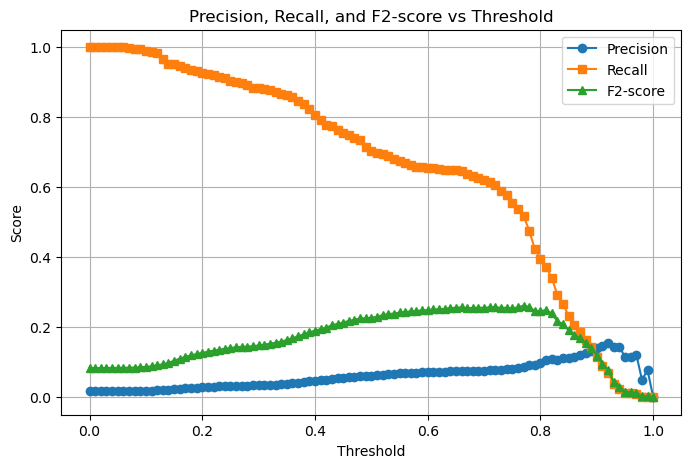

In [61]:
best_model = random_search.best_estimator_

y_pred_proba = best_model.predict_proba(X_train)[:, 1]  # Probabilitas kelas positif
y_pred = best_model.predict(X_train)                    # Prediksi default (threshold=0.5)

from sklearn.metrics import precision_score, recall_score, fbeta_score

thresholds = np.arange(0.0, 1.01, 0.01)

precision_list = []
recall_list = []
f2_list = []

for t in thresholds:
    y_pred_t = (y_pred_proba >= t).astype(int)
    precision_list.append(precision_score(y_train, y_pred_t))
    recall_list.append(recall_score(y_train, y_pred_t))
    f2_list.append(fbeta_score(y_train, y_pred_t, beta=2))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precision_list, label='Precision', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='s')
plt.plot(thresholds, f2_list, label='F2-score', marker='^')

plt.title('Precision, Recall, and F2-score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()



**Interpretation:**

- The **Recall** curve (orange) remains high for lower thresholds but declines steadily as the threshold increases.  
- **Precision** (blue) gradually increases, but the improvement is marginal compared to the recall loss.  
- The **F2-score** (green), which gives more weight to recall, peaks roughly around a threshold of 0.5–0.6.

**Decision:**  
Because the project prioritizes **recall** (reducing false negatives where a potential claimant is predicted as non-claim), adjusting the threshold does not offer significant improvement.  

Therefore, the default threshold of **0.5** is retained.

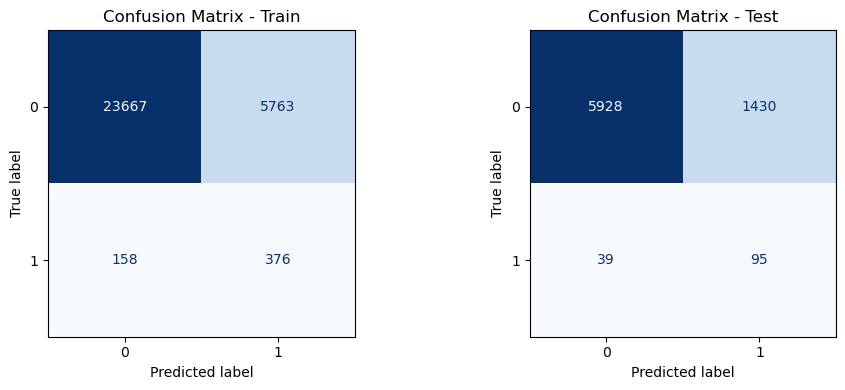

In [62]:
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

best_model = random_search.best_estimator_

# Prediksi probabilitas dan label
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(cm_train).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title("Confusion Matrix - Train")

ConfusionMatrixDisplay(cm_test).plot(ax=ax[1], cmap='Blues', colorbar=False)
ax[1].set_title("Confusion Matrix - Test")

plt.tight_layout()
plt.show()

In [63]:
# Classification report
print("=== TRAIN PERFORMANCE ===")
print(classification_report(y_train, y_pred_train))

print("\n=== TEST PERFORMANCE ===")
print(classification_report(y_test, y_pred_test))

=== TRAIN PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     29430
           1       0.06      0.70      0.11       534

    accuracy                           0.80     29964
   macro avg       0.53      0.75      0.50     29964
weighted avg       0.98      0.80      0.87     29964


=== TEST PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      7358
           1       0.06      0.71      0.11       134

    accuracy                           0.80      7492
   macro avg       0.53      0.76      0.50      7492
weighted avg       0.98      0.80      0.88      7492



**Model Generalization Analysis**

#### 1. Train vs Test Consistency
| Metric | Train | Test |
|:-------|:------:|:------:|
| Accuracy | 0.80 | 0.80 |
| Recall (Class 1) | 0.70 | 0.71 |
| Precision (Class 1) | 0.06 | 0.06 |

The model performs consistently on both train and test data, indicating **no signs of overfitting or underfitting**. It generalizes well to unseen data.

---

#### 2. Strong Recall Performance
The recall for the minority class is around **0.71**, meaning the model successfully detects most positive cases.  
This aligns with the main goal of maximizing recall on an imbalanced dataset.

---

#### 3. Precision–Recall Trade-off
While precision is low (0.06), this is expected since the model prioritizes recall.  
Such trade-offs are acceptable in scenarios where **capturing all positives is more critical** than minimizing false alarms.

---

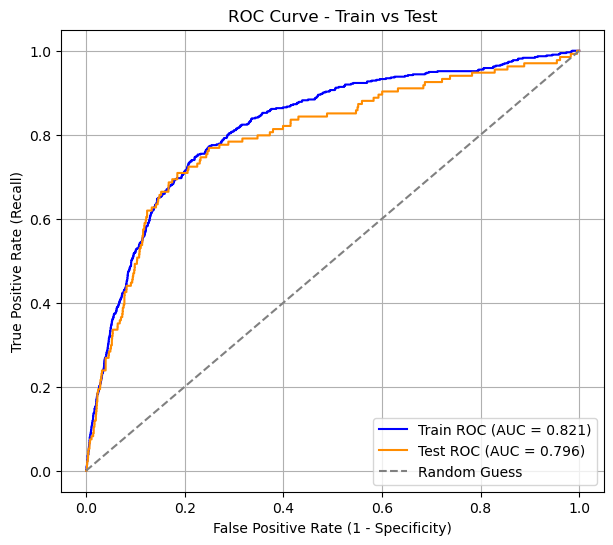

In [64]:
# === ROC-AUC Curve (Train vs Test) ===

y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Hitung FPR, TPR, AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)

roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Plot ROC-AUC Train vs Test
plt.figure(figsize=(7,6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {roc_auc_train:.3f})')
plt.plot(fpr_test, tpr_test, color='darkorange', label=f'Test ROC (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Train vs Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**ROC–AUC Analysis**

The ROC curve compares the model's ability to distinguish between classes on both training and test datasets.

| Dataset | AUC Score |
|:---------|:----------:|
| Train | 0.821 |
| Test | 0.796 |

---

#### Interpretation
- Both curves show a similar shape and performance, indicating that the model generalizes well without overfitting.  
- The **AUC score of ~0.80** suggests that the model has a **good discriminative ability**, meaning it can effectively separate claim and non-claim cases.  
- The small gap between train and test AUC values confirms **stable performance** on unseen data.

---


In [65]:
# Extract the SelectKBest step
select_k_best = random_search.best_estimator_.named_steps['feature_selection']

# Extract the column transformer step
column_transformer = random_search.best_estimator_.named_steps['preprocessor']

# Get the feature names after one-hot encoding
num_feature_names= column_transformer.named_transformers_['Numerical'].get_feature_names_out(['Duration', 'Net Sales','Commision (in value)', 'Age'])

cat1_feature_names = column_transformer.named_transformers_['Categorical 1'].get_feature_names_out(['Agency Type', 'Distribution Channel'])
cat2_feature_names = column_transformer.named_transformers_['Categorical 2'].get_feature_names_out(['Agency','Product Name', 'Destination'])

feat_cols=list(num_feature_names)+list(cat1_feature_names) + list(cat2_feature_names)

select_k_best.get_feature_names_out(feat_cols)

array(['Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Agency Type_Travel Agency', 'Agency_0', 'Agency_1', 'Agency_2',
       'Product Name_0', 'Product Name_2', 'Product Name_3',
       'Product Name_4', 'Destination_0', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Destination_6', 'Destination_7'], dtype=object)

### Feature Importance

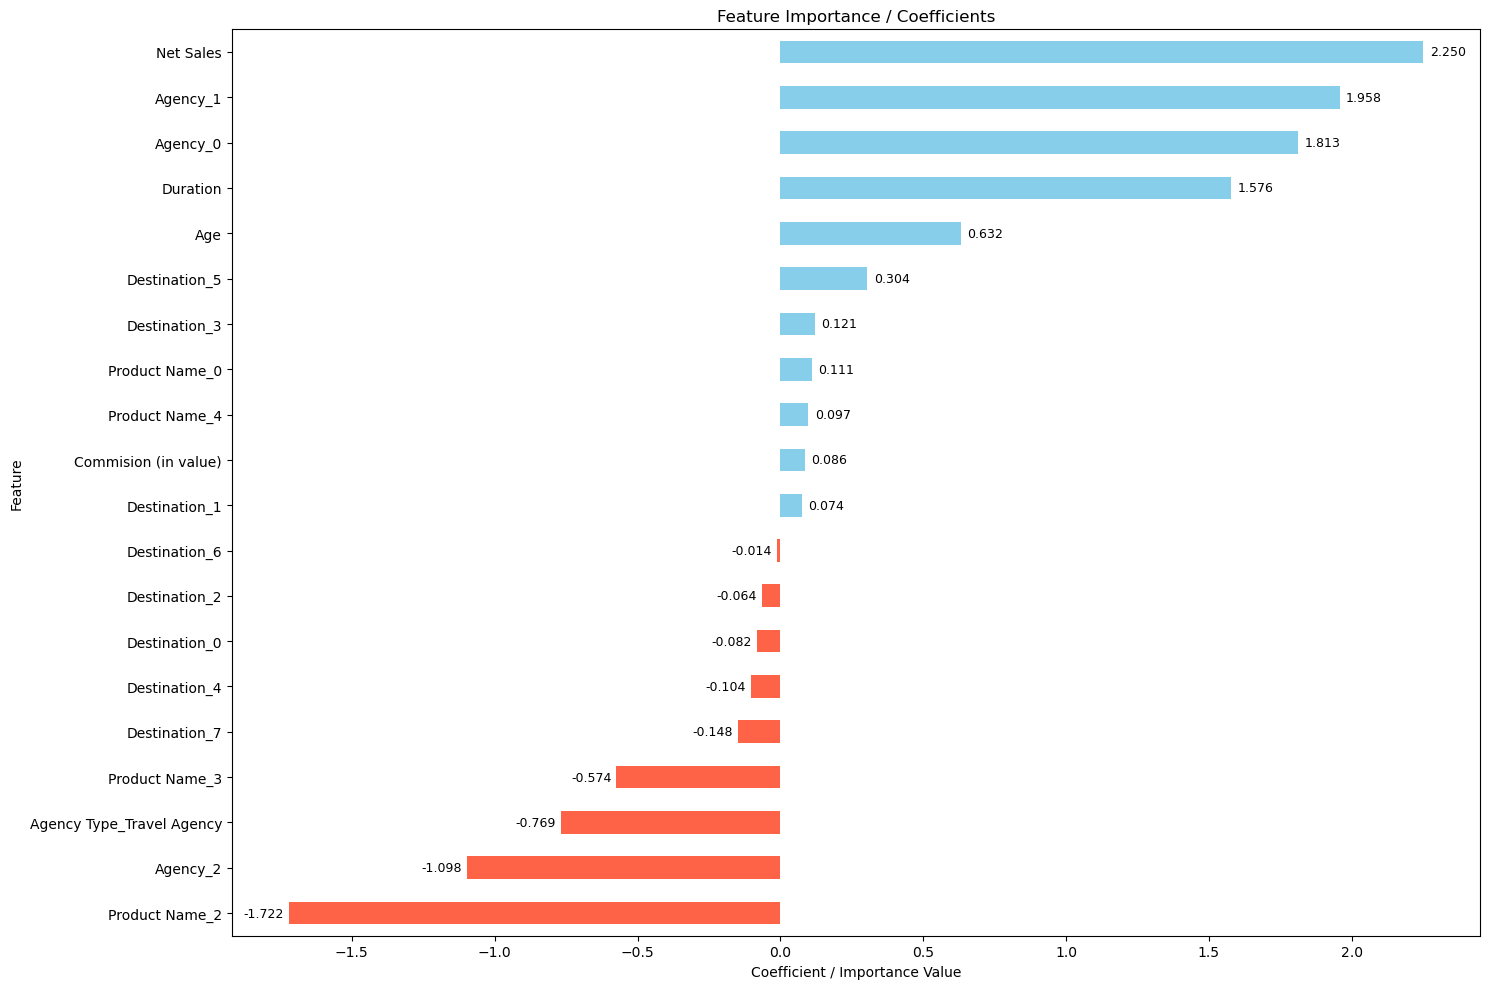

In [66]:

best_model = random_search.best_estimator_.named_steps['classifier']

# Ambil nama fitur setelah feature_selection
feature_names = random_search.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Ambil nilai koefisien atau feature importance
if hasattr(best_model, "coef_"):
    # Logistic Regression (pakai nilai asli)
    coefficients = best_model.coef_.flatten()
    model_coef1 = pd.Series(coefficients, index=selected_feature_names).sort_values()
elif hasattr(best_model, "feature_importances_"):
    # Tree-based model
    importances = best_model.feature_importances_
    model_coef1 = pd.Series(importances, index=selected_feature_names).sort_values()
else:
    raise ValueError("Model tidak punya coef_ atau feature_importances_")

# Plot
plt.figure(figsize=(15, 10))
bars = model_coef1.plot(
    kind='barh',
    color=['skyblue' if v > 0 else 'tomato' for v in model_coef1],
    title='Feature Importance / Coefficients'
)

# Tambahkan nilai di ujung bar
for i, v in enumerate(model_coef1):
    plt.text(
        v + (0.01 * model_coef1.max() if v > 0 else 0.01 * model_coef1.min()),
        i,
        f'{v:.3f}',
        va='center',
        ha='left' if v > 0 else 'right',
        fontsize=9
    )

plt.xlabel('Coefficient / Importance Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


The chart above shows the **magnitude and direction** of each feature’s influence on the likelihood of a customer making a claim.

---

#### Interpretation

- **Positive coefficients (blue bars):**  
  These features increase the likelihood of the target class (claim = 1).  
  - Example: `Net Sales`, `Agency_1`, and `Duration` have strong positive effects, meaning higher values are associated with a greater chance of a claim.

- **Negative coefficients (red bars):**  
  These features decrease the likelihood of the target class.  
  - Example: `Product Name_2` and `Agency_2` have negative coefficients, indicating that these categories are linked to a lower probability of a claim.

---



### Rule Based Underwriting System

The rule-based system implemented here represents a transparent, manually defined decision framework similar to the one used in Terra. The process begins by converting several numerical variables, such as Duration, Net Sales, Commission (in value), and Age, into categorical bins (e.g., Short, High, Young). This discretization allows clearer pattern recognition.

For each categorical feature, the percentage of claims (Claim = 1) was calculated per category. Categories with a claim rate above the median were designated as high-risk. These high-risk categories were then compiled into a reference dictionary that forms the basis of the rule system.

Each record is evaluated by counting how many of its feature values belong to these high-risk categories. If the number of matches reaches a predefined threshold (in this case, seven or more), the observation is classified as Claim = 1; otherwise, it is predicted as Claim = 0. 

The performance of this rule-based system was then benchmarked against the logistic regression model, the best-performing machine learning (ML) approach identified earlier. Confusion matrices were plotted for both models using training data to compare predictive behavior.

In [67]:
X_train.describe()
X_train_rule = X_train.copy()

In [68]:
# make categories from numerical variables

X_train_rule['Duration_cat'] = pd.cut(
    X_train['Duration'],
    bins=[-1, 9, 23, 55, 529],
    labels=['Very Short', 'Short', 'Medium', 'Long']
)

X_train_rule['NetSales_cat'] = pd.cut(
    X_train['Net Sales'],
    bins=[-1, 19, 29, 51, 682],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

X_train_rule['Commission_cat'] = pd.cut(
    X_train['Commision (in value)'],
    bins=[-0.1, 0, 10, 210],
    labels=['None', 'Low', 'High']
)

X_train_rule['Age_cat'] = pd.cut(
    X_train['Age'],
    bins=[-1, 34, 36, 44, 88],
    labels=['Young', 'Mid-age', 'Mature', 'Senior']
)


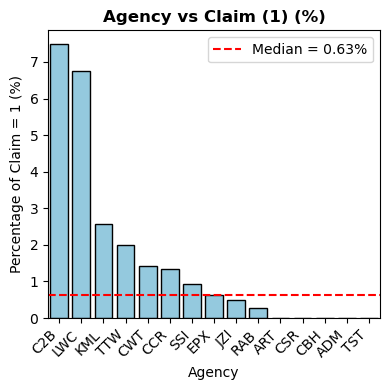

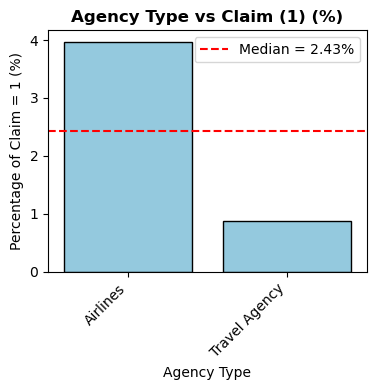

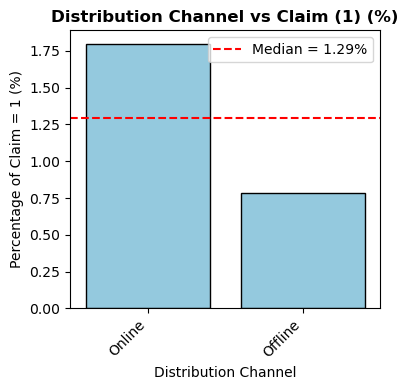

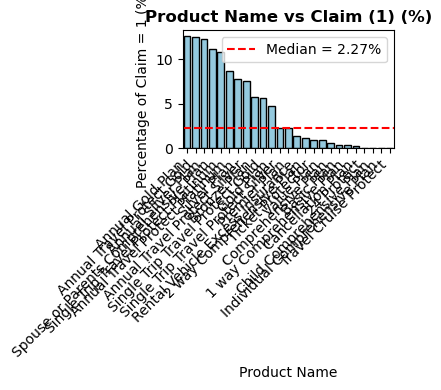

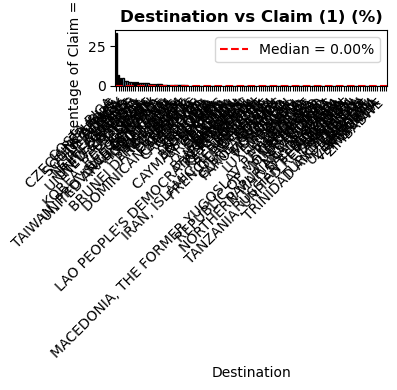

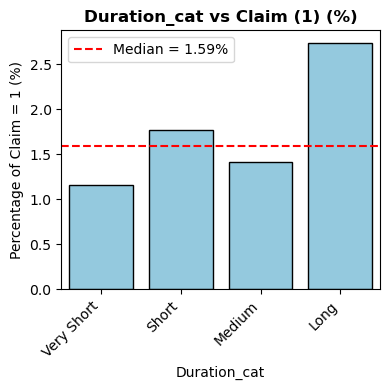

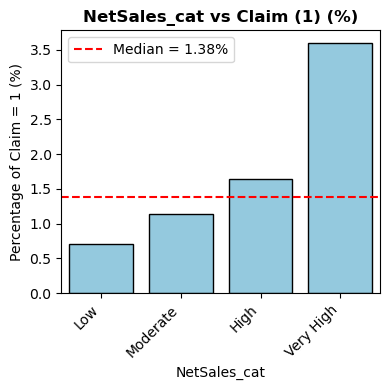

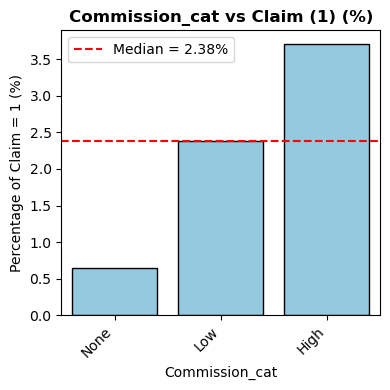

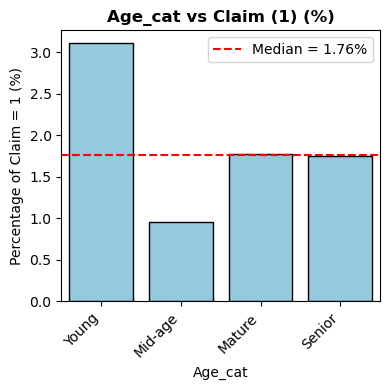


=== High-Risk Categories per Feature ===
Agency: ['C2B', 'LWC', 'KML', 'TTW', 'CWT', 'CCR', 'SSI']
Agency Type: ['Airlines']
Distribution Channel: ['Online']
Product Name: ['Annual Gold Plan', 'Annual Travel Protect Gold', 'Annual Silver Plan', 'Spouse or Parents Comprehensive Plan', 'Single Trip Travel Protect Platinum', 'Annual Travel Protect Platinum', 'Silver Plan', 'Annual Travel Protect Silver', 'Bronze Plan', 'Single Trip Travel Protect Gold', 'Gold Plan', 'Single Trip Travel Protect Silver']
Destination: ['COSTA RICA', 'CZECH REPUBLIC', 'SINGAPORE', 'ISRAEL', 'SOUTH AFRICA', 'TURKEY', 'ITALY', 'NETHERLANDS', 'ICELAND', 'FRANCE', 'GREECE', 'UNITED STATES', 'UNITED KINGDOM', 'NEW ZEALAND', 'NORWAY', 'AUSTRALIA', 'CHINA', 'SPAIN', 'KOREA, REPUBLIC OF', 'CANADA', 'JAPAN', 'GERMANY', 'SWITZERLAND', 'TAIWAN, PROVINCE OF CHINA', 'UNITED ARAB EMIRATES', 'INDONESIA', 'HONG KONG', 'THAILAND', 'VIET NAM', 'MALAYSIA', 'INDIA', 'PHILIPPINES', 'MYANMAR', 'BRUNEI DARUSSALAM']
Duration_cat: [

In [69]:
cat_features = [
    'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination',
    'Duration_cat','NetSales_cat','Commission_cat','Age_cat'
]

# Dictionary untuk simpan kategori yang di atas median
high_risk_rules = {}

for feature in cat_features:
    # Crosstab: persentase Claim=1 per kategori
    ct = pd.crosstab(X_train_rule[feature], y_train, normalize='index') * 100

    if 1 not in ct.columns:
        print(f"\n⚠️ No '1' values found for {feature}")
        continue

    ct = ct.sort_values(1, ascending=False)

    # Hitung median
    median_1 = ct[1].median()

    # Simpan kategori dengan nilai > median
    high_risk = ct[ct[1] > median_1].index.tolist()
    high_risk_rules[feature] = high_risk

    # Plot
    plt.figure(figsize=(4, 4))
    sns.barplot(x=ct.index, y=ct[1], color='skyblue', edgecolor='black')
    plt.axhline(median_1, color='red', linestyle='--', label=f'Median = {median_1:.2f}%')
    plt.title(f'{feature} vs Claim (1) (%)', fontsize=12, fontweight='bold')
    plt.ylabel('Percentage of Claim = 1 (%)')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Tampilkan hasil kategori high-risk
print("\n=== High-Risk Categories per Feature ===")
for feature, categories in high_risk_rules.items():
    print(f"{feature}: {categories}")


In [70]:
# High-risk categories
high_risk = {
    'Agency': ['C2B', 'LWC', 'KML', 'TTW', 'CWT', 'CCR', 'SSI'],
    'Agency Type': ['Airlines'],
    'Distribution Channel': ['Online'],
    'Product Name': ['Annual Gold Plan', 'Annual Travel Protect Gold', 'Annual Silver Plan', 'Spouse or Parents Comprehensive Plan', 
                     'Single Trip Travel Protect Platinum', 'Annual Travel Protect Platinum', 'Silver Plan', 
                     'Annual Travel Protect Silver', 'Bronze Plan', 'Single Trip Travel Protect Gold', 
                     'Gold Plan', 'Single Trip Travel Protect Silver'],
    'Destination': ['COSTA RICA', 'CZECH REPUBLIC', 'SINGAPORE', 'ISRAEL', 'SOUTH AFRICA', 'TURKEY', 'ITALY', 'NETHERLANDS', 
                    'ICELAND', 'FRANCE', 'GREECE', 'UNITED STATES', 'UNITED KINGDOM', 'NEW ZEALAND', 'NORWAY', 'AUSTRALIA', 
                    'CHINA', 'SPAIN', 'KOREA, REPUBLIC OF', 'CANADA', 'JAPAN', 'GERMANY', 'SWITZERLAND', 'TAIWAN, PROVINCE OF CHINA', 
                    'UNITED ARAB EMIRATES', 'INDONESIA', 'HONG KONG', 'THAILAND', 'VIET NAM', 'MALAYSIA', 'INDIA', 'PHILIPPINES', 
                    'MYANMAR', 'BRUNEI DARUSSALAM'],
    'Duration_cat': ['Long','Short'],
    'NetSales_cat': ['Very High','High'],
    'Commission_cat': ['High'],
    'Age_cat': ['Young','Mature']
}

def rule_based_predict(df):
    preds = []
    for _, row in df.iterrows():
        score = 0
        for feature, risky_vals in high_risk.items():
            if row[feature] in risky_vals:
                score += 1
        
        preds.append(1 if score >= 7 else 0) # very strict rule-based system
    return np.array(preds)

# Apply the rule-based model to train data
y_pred_rule = rule_based_predict(X_train_rule)


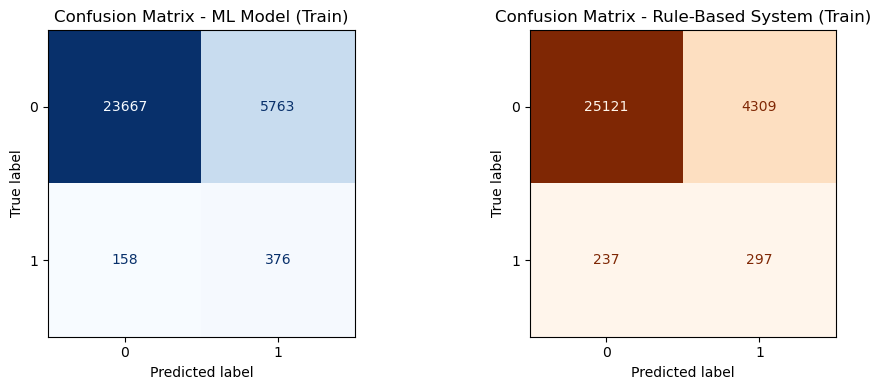

In [71]:
# Predict ML Model
best_model = random_search.best_estimator_

y_pred_ml = best_model.predict(X_train)

# Confusion matrices
cm_ml = confusion_matrix(y_train, y_pred_ml)
cm_rule = confusion_matrix(y_train, y_pred_rule)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay(cm_ml).plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title("Confusion Matrix - ML Model (Train)")

ConfusionMatrixDisplay(cm_rule).plot(ax=ax[1], cmap='Oranges', colorbar=False)
ax[1].set_title("Confusion Matrix - Rule-Based System (Train)")

plt.tight_layout()
plt.show()


### **Model Performance Comparison in Terms of Financial Loss**

In the context of travel insurance, false negatives represent cases where customers who actually make a claim are predicted as non-claim by the model. This situation can lead to unexpected financial losses for the company, as those claims are not anticipated in advance. 

Assuming the average claim value is **$1,000 per case**, the total potential loss from false negatives in the **machine learning (ML) model is $158,000** (158 × $1,000), while the **strict rule-based system incurs a higher potential loss of $237,000** (237 × $1,000). This indicates that the **ML model successfully reduces potential financial losses by approximately 33.3%** compared to the rule-based approach, demonstrating its effectiveness in minimizing undetected claim risks.

## Conclusion

The results demonstrate that the **logistic regression model** performs effectively in predicting travel insurance claims. Both training and testing evaluations show consistent performance with **AUC scores of 0.82 and 0.80**, respectively, indicating that the model generalizes well and does not exhibit overfitting.

When compared to the **existing rule-based system** implemented in Terra, the machine learning model demonstrates a clear advantage. While the rule-based approach ensures interpretability, it is relatively rigid and fails to capture complex relationships between variables.

From a financial standpoint, assuming an average claim value of **$1,000 per case**, the machine learning model reduces potential financial loss from false negatives by approximately **33%** compared to the rule-based system. This reduction underscores its effectiveness in minimizing undetected claim risks and improving overall business efficiency.

---

## Recommendations

1. **Adopt the ML-based model** for claim prediction, as it achieves better performance and reduces potential financial losses compared to the rule-based approach.  
1. **Experiment with more advanced algorithms** (e.g., Random Forest, XGBoost, LightGBM, or Gradient Boosting) to explore potential performance improvements.  
1. **Perform hyperparameter optimization** using techniques such as **GridSearchCV** for all models to ensure the best possible tuning.  

---

Overall, the **logistic regression model** provides data-driven solution that significantly improves claim prediction accuracy and financial risk mitigation compared to the traditional rule-based system, while still allowing room for further enhancement through model experimentation and optimization.


### Model Limitations

In [72]:
X.describe().T[['min','max']].reset_index().rename(columns={'index':'columns'})

,columns,min,max
0,Duration,0.00,547.00
1,Net Sales,0.19,682.00
2,Commision (in value),0.00,210.21
3,Age,0.00,88.00


In [73]:
list_unik=[]
list_nunik = []
for i in X.select_dtypes(exclude='number').columns:
    b=X[i].nunique()
    list_nunik.append(b)
    a = X[i].unique().tolist()
    a_str = '; '.join(map(str, a))
    list_unik.append(a_str)

pd.DataFrame({'columns':X.select_dtypes(exclude='number').columns,'nunique':list_nunik,'unique':list_unik})

,columns,nunique,unique
0,Agency,15,C2B; EPX; JZI; CWT; LWC; ART; CSR; RAB; KML; SSI; TST; TTW; ADM; CCR; CBH
1,Agency Type,2,Airlines; Travel Agency
2,Distribution Channel,2,Online; Offline
3,Product Name,25,Annual Silver Plan; Cancellation Plan; Basic Plan; 2 way Comprehensive Plan; Bronze Plan; 1 way Comprehensive Plan; Rental Vehicle Excess Insurance; Single Trip Travel Protect Gold; Silver Plan; Value Plan; 24 Protect; Annual Travel Protect Gold; Comprehensive Plan; Ticket Protector; Travel Cruise Protect; Single Trip Travel Protect Silver; Individual Comprehensive Plan; Gold Plan; Annual Gold Plan; Child Comprehensive Plan; Annual Travel Protect Silver; Single Trip Travel Protect Platinum; Premier Plan; Annual Travel Protect Platinum; Spouse or Parents Comprehensive Plan
4,Destination,134,"SINGAPORE; MALAYSIA; INDIA; UNITED STATES; KOREA, REPUBLIC OF; THAILAND; GERMANY; JAPAN; INDONESIA; VIET NAM; AUSTRALIA; FINLAND; UNITED KINGDOM; SRI LANKA; SPAIN; HONG KONG; MACAO; CHINA; IRAN, ISLAMIC REPUBLIC OF; TAIWAN, PROVINCE OF CHINA; POLAND; CANADA; OMAN; PHILIPPINES; GREECE; TURKEY; BRUNEI DARUSSALAM; DENMARK; SWITZERLAND; BELGIUM; SWEDEN; MYANMAR; KENYA; CZECH REPUBLIC; FRANCE; RUSSIAN FEDERATION; PAKISTAN; ARGENTINA; TANZANIA, UNITED REPUBLIC OF; SERBIA; ITALY; CROATIA; NEW ZEALAND; UNITED ARAB EMIRATES; NETHERLANDS; PERU; MONGOLIA; CAMBODIA; QATAR; NORWAY; LUXEMBOURG; MALTA; LAO PEOPLE'S DEMOCRATIC REPUBLIC; ISRAEL; SAUDI ARABIA; AUSTRIA; PORTUGAL; UKRAINE; ESTONIA; ICELAND; BRAZIL; MEXICO; CAYMAN ISLANDS; PANAMA; BANGLADESH; TURKMENISTAN; BAHRAIN; KAZAKHSTAN; TUNISIA; IRELAND; ETHIOPIA; NORTHERN MARIANA ISLANDS; MALDIVES; VENEZUELA; NEPAL; SOUTH AFRICA; COSTA RICA; JORDAN; MALI; CYPRUS; MAURITIUS; LEBANON; KUWAIT; AZERBAIJAN; HUNGARY; BHUTAN; MOROCCO; ECUADOR; UZBEKISTAN; CHILE; FIJI; PAPUA NEW GUINEA; FRENCH POLYNESIA; NIGERIA; MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF; NAMIBIA; GEORGIA; COLOMBIA; SLOVENIA; EGYPT; ZIMBABWE; BULGARIA; BERMUDA; URUGUAY; GUINEA; GHANA; BOLIVIA; TRINIDAD AND TOBAGO; VANUATU; GUAM; UGANDA; JAMAICA; ROMANIA; REPUBLIC OF MONTENEGRO; KYRGYZSTAN; GUADELOUPE; RWANDA; BOTSWANA; ZAMBIA; GUYANA; LITHUANIA; GUINEA-BISSAU; SENEGAL; CAMEROON; SAMOA; PUERTO RICO; TAJIKISTAN; BELARUS; ARMENIA; FAROE ISLANDS; DOMINICAN REPUBLIC; MOLDOVA, REPUBLIC OF; BENIN; REUNION"


The model performs effectively within the following data constraints:

- **Duration**: 0–547 days  
- **Net Sales**: \$0.19–\$682  
- **Commission (in value)**: \$0–\$210.21  
- **Age**: 0–88 years  
- **Agency**: 15 listed agencies  
- **Agency Type**: 2 types (Airlines, Travel Agency)  
- **Distribution Channel**: 2 types (Online, Offline)  
- **Product Name**: 25 available insurance plans  
- **Destination**: 134 listed countries  

Any input data outside these ranges or categories may reduce the model’s reliability and prediction accuracy.


## Save Pickle

In [74]:
# Get the best estimator from random_search
best_estimator_final = random_search.best_estimator_

#Fit model ke fitur data train dan test yang sudah disatukan dan label data train dan test yang telah disatukan
best_estimator_final.fit(X,y)

,steps,"[('preprocessor', ...), ('feature_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Categorical 1', ...), ('Categorical 2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [75]:
import pickle

pickle.dump(best_estimator_final,open('travel-insurance-prediction-model.sav','wb'))

Exception ignored in: <function ResourceTracker.__del__ at 0x10bc0db20>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105215b20>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x108451b20>
Traceback (most recent call last